# *Exploring TTC Streetcar Delays and Forecasting Delays*

- Created on: November, 2023
- Created by: Jessica Seo
---------

## 🚂 Data Cleaning and Exploration

###  Notebook Contents

- [Introduction](#introID)
- [Data Dictionary](#datadicID)
- [Data Preparation](#dataID)
- [Feature Engineering](#featureID)
- [Exploratory Data Analysis](#EDAID)
- [Summary](#summaryID)
- [Data Saving](#saveID)
-------

## <a id='introID'> Introduction </a>

This notebook will preprocess the Streetcar and Weather data, which were merged in the `2.Loading Streetcar notebook`, to analyze and prepare for the application of machine learning models in a later notebook.

---
##  <a id="datadicID"> Data Dictionary </a>

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Column Contents</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>Datetime</code> </td>
    <td style="text-align: left">Date and time of when weather data and streetcar delay was recorded between January, 01, 2021 to September 30, 2023.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Temperature</code></td>
    <td style="text-align: left">Atmostpheric temperature in degrees Celsius.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Precipitation</code></td>
    <td style="text-align: left">Precipitation amount stored in mm.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Summer_PT</code></td>
    <td style="text-align: left">Percieved temperature in Summer to indicate hot temperature.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Winter_PT</code></td>
    <td style="text-align: left">Percieved temperature in Winter to indicate hot temperature.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Visibility</code></td>
    <td style="text-align: left">Visibility of weather atmosphere in km.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Weather</code></td>
    <td style="text-align: left">Observations of atmospheric phenomenon.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Time</code></td>
    <td style="text-align: left">When the delay causing incident occurred.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Day</code></td>
    <td style="text-align: left">The name of the day.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Min Delay</code></td>
    <td style="text-align: left">The actual delay minutes.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Min Gap</code></td>
    <td style="text-align: left">The total scheduled time in minutes between the streetcar in front and the following streetcar.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Route</code></td>
    <td style="text-align: left">The number of streetcar route.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Line</code></td>
    <td style="text-align: left">Streetcar number.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Vehicle</code></td>
    <td style="text-align: left">Vehicle number.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Location</code></td>
    <td style="text-align: left">The location of the delay.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Incident</code></td>
    <td style="text-align: left">The description of the delay causing incident. </td>
  </tr>
</table>


----
## <a id='dataID'> Data Preparation </a>

In [1]:
#importing necessary python library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading merged datasest
raw_df=pd.read_csv('data/Streetcar_Weather_Data.csv')
raw_df

,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle,delaytime,datetime,Temp Definition °C,Precip. Amount Definition mm,Wind Spd Definition km/h,Visibility Definition km,Hmdx Definition,Wind Chill Definition,Weather Definition
0,501,03:15,Friday,QUEEN AND MCCAUL,Operations,19,24,4574,2021-01-01 03:15:00,2021-01-01 03:00:00,-2.0,0.0,5,16.1,NaN,-4.0,LegendNANA
1,504,03:37,Friday,BROADVIEW AND QUEEN,Operations,15,30,4500,2021-01-01 03:37:00,2021-01-01 03:00:00,-2.0,0.0,5,16.1,NaN,-4.0,LegendNANA
2,504,04:00,Friday,BROADVIEW STATION,Cleaning,15,30,4589,2021-01-01 04:00:00,2021-01-01 04:00:00,-1.4,0.0,5,16.1,NaN,-3.0,LegendNANA
3,504,04:03,Friday,DUNDAS WEST STATION,Cleaning,15,30,4582,2021-01-01 04:03:00,2021-01-01 04:00:00,-1.4,0.0,5,16.1,NaN,-3.0,LegendNANA
4,506,05:37,Friday,MAIN STATION,Mechanical,10,20,3480,2021-01-01 05:37:00,2021-01-01 05:00:00,0.4,0.0,5,16.1,NaN,NaN,LegendNANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42397,511,22:53,Saturday,FLEET AND MANITOBA,Diversion,44,54,4593,2023-09-30 22:53:00,2023-09-30 22:00:00,16.6,0.0,4,16.1,NaN,NaN,LegendNANA
42398,505,23:21,Saturday,KINGSTON RD LOOP,Security,10,20,4503,2023-09-30 23:21:00,2023-09-30 23:00:00,16.9,0.0,4,16.1,NaN,NaN,LegendNANA
42399,513,23:41,Saturday,1626 QUEEN ST EAST,Operations,10,10,8818,2023-09-30 23:41:00,2023-09-30 23:00:00,16.9,0.0,4,16.1,NaN,NaN,LegendNANA
42400,501,00:48,Saturday,QUEEN AND AUGUSTA,Diversion,41,61,0,2023-09-30 00:48:00,2023-09-30 00:00:00,16.9,0.0,11,16.1,NaN,NaN,LegendNANA


In [4]:
#checking datatypes, shape
print(f'This dataframe have {raw_df.shape[0]} rows and {raw_df.shape[1]} columns. We see that the size matches the data from the previous notebook.')
print('\n')
raw_df.info()

This dataframe have 42402 rows and 17 columns. We see that the size matches the data from the previous notebook.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42402 entries, 0 to 42401
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Line                          42186 non-null  object 
 1   Time                          42402 non-null  object 
 2   Day                           42402 non-null  object 
 3   Location                      42402 non-null  object 
 4   Incident                      42401 non-null  object 
 5   Min Delay                     42402 non-null  int64  
 6   Min Gap                       42402 non-null  int64  
 7   Vehicle                       42402 non-null  int64  
 8   delaytime                     42402 non-null  object 
 9   datetime                      42402 non-null  object 
 10  Temp Definition °C            42337 non-null  object 
 11  Prec

In [5]:
raw_df.columns

Index(['Line', 'Time', 'Day', 'Location', 'Incident', 'Min Delay', 'Min Gap',
       'Vehicle', 'delaytime', 'datetime', 'Temp Definition °C',
       'Precip. Amount Definition mm', 'Wind Spd Definition km/h',
       'Visibility Definition km', 'Hmdx Definition', 'Wind Chill Definition',
       'Weather Definition'],
      dtype='object')

In [6]:
#relisting the columns for readability
change_column=['datetime','Temp Definition °C', 'Precip. Amount Definition mm','Hmdx Definition', 'Wind Chill Definition','Wind Spd Definition km/h','Visibility Definition km','Weather Definition','delaytime','Day','Time','Line','Vehicle','Location','Incident','Min Delay','Min Gap']
raw_df=raw_df.reindex(columns=change_column)
raw_df.head(3)

,datetime,Temp Definition °C,Precip. Amount Definition mm,Hmdx Definition,Wind Chill Definition,Wind Spd Definition km/h,Visibility Definition km,Weather Definition,delaytime,Day,Time,Line,Vehicle,Location,Incident,Min Delay,Min Gap
0,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,LegendNANA,2021-01-01 03:15:00,Friday,03:15,501,4574,QUEEN AND MCCAUL,Operations,19,24
1,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,LegendNANA,2021-01-01 03:37:00,Friday,03:37,504,4500,BROADVIEW AND QUEEN,Operations,15,30
2,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5,16.1,LegendNANA,2021-01-01 04:00:00,Friday,04:00,504,4589,BROADVIEW STATION,Cleaning,15,30


In [7]:
#renaming columns for readability.
raw_df.columns=['Datetime','Temperature','Precipitation','Summer_PT','Winter_PT','Wind_Speed','Visibility','Weather','Delaytime','Day','Time','Line','Vehicle','Location','Incident','Min_Delay','Min_Gap']
raw_df

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
0,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,LegendNANA,2021-01-01 03:15:00,Friday,03:15,501,4574,QUEEN AND MCCAUL,Operations,19,24
1,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,LegendNANA,2021-01-01 03:37:00,Friday,03:37,504,4500,BROADVIEW AND QUEEN,Operations,15,30
2,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5,16.1,LegendNANA,2021-01-01 04:00:00,Friday,04:00,504,4589,BROADVIEW STATION,Cleaning,15,30
3,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5,16.1,LegendNANA,2021-01-01 04:03:00,Friday,04:03,504,4582,DUNDAS WEST STATION,Cleaning,15,30
4,2021-01-01 05:00:00,0.4,0.0,NaN,NaN,5,16.1,LegendNANA,2021-01-01 05:37:00,Friday,05:37,506,3480,MAIN STATION,Mechanical,10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42397,2023-09-30 22:00:00,16.6,0.0,NaN,NaN,4,16.1,LegendNANA,2023-09-30 22:53:00,Saturday,22:53,511,4593,FLEET AND MANITOBA,Diversion,44,54
42398,2023-09-30 23:00:00,16.9,0.0,NaN,NaN,4,16.1,LegendNANA,2023-09-30 23:21:00,Saturday,23:21,505,4503,KINGSTON RD LOOP,Security,10,20
42399,2023-09-30 23:00:00,16.9,0.0,NaN,NaN,4,16.1,LegendNANA,2023-09-30 23:41:00,Saturday,23:41,513,8818,1626 QUEEN ST EAST,Operations,10,10
42400,2023-09-30 00:00:00,16.9,0.0,NaN,NaN,11,16.1,LegendNANA,2023-09-30 00:48:00,Saturday,00:48,501,0,QUEEN AND AUGUSTA,Diversion,41,61


We can work to convert `Datetime`, `Temperature`, `Wind_Speed`, `Delaytime`, `Line` and `Visibility` column datatypes. We see that few columns have null values.

In [8]:
#converting datetime
raw_df[['Datetime', 'Delaytime']] = raw_df[['Datetime', 'Delaytime']].apply(pd.to_datetime)

In [9]:
#sanity check
raw_df.dtypes

Datetime         datetime64[ns]
Temperature              object
Precipitation           float64
Summer_PT               float64
Winter_PT               float64
Wind_Speed               object
Visibility               object
Weather                  object
Delaytime        datetime64[ns]
Day                      object
Time                     object
Line                     object
Vehicle                   int64
Location                 object
Incident                 object
Min_Delay                 int64
Min_Gap                   int64
dtype: object

In [10]:
#checking duplicates before preprocessing
raw_df.duplicated().sum()

137

In [11]:
#Checking the proportion of duplicated rows in overall data 
raw_df.duplicated().sum()/raw_df.shape[0]*100

0.32309796707702465

In [12]:
#looking at duplicated values
raw_df.loc[raw_df.duplicated(), :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
40,2021-01-01 17:00:00,2.3,0.0,NaN,NaN,21,16.1,LegendNANA,2021-01-01 17:49:00,Friday,17:49,506,3451,MAIN STREET STATION,Operations,7,14
42,2021-01-01 20:00:00,0.6,2.0,NaN,NaN,32,3.2,Snow,2021-01-01 20:35:00,Friday,20:35,504,4492,BROADVIEW STATION,Operations,10,20
88,2021-01-02 15:00:00,1.7,0.0,NaN,NaN,11,16.1,LegendNANA,2021-01-02 15:36:00,Saturday,15:36,510,4445,SPADINA AND QUEEN'S QU,Cleaning,7,14
93,2021-01-02 19:00:00,1.5,0.0,NaN,NaN,8,16.1,LegendNANA,2021-01-02 19:14:00,Saturday,19:14,510,4428,UNION STATION,Cleaning,5,10
123,2021-01-03 18:00:00,1.3,0.0,NaN,NaN,13,16.1,LegendNANA,2021-01-03 18:14:00,Sunday,18:14,509,4543,EXHIBITION LOOP,Operations,10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40705,2023-08-13 15:00:00,23.4,0.0,27.0,NaN,17,16.1,LegendNANA,2023-08-13 15:38:00,Sunday,15:38,509,4563,UNION STATION,General Delay,6,13
40949,2023-08-19 17:00:00,18.6,0.0,NaN,NaN,11,16.1,LegendNANA,2023-08-19 17:13:00,Saturday,17:13,505,4483,QUEEN AND WOODFIELD,Operations,10,20
41049,2023-08-22 08:00:00,20.0,0.0,NaN,NaN,13,16.1,LegendNANA,2023-08-22 08:23:00,Tuesday,08:23,503,1503,BINGHAM LOOP,Mechanical,10,20
41327,2023-08-29 16:00:00,23.1,0.0,27.0,NaN,9,16.1,LegendNANA,2023-08-29 16:10:00,Tuesday,16:10,501,3515,GERRARD AND MUNRO,Mechanical,7,14


In [13]:
#checking duplicate
raw_df[(raw_df.Datetime=='2021-01-01 17:00:00')&(raw_df.Line == '506')]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
39,2021-01-01 17:00:00,2.3,0.0,NaN,NaN,21,16.1,LegendNANA,2021-01-01 17:49:00,Friday,17:49,506,3451,MAIN STREET STATION,Operations,7,14
40,2021-01-01 17:00:00,2.3,0.0,NaN,NaN,21,16.1,LegendNANA,2021-01-01 17:49:00,Friday,17:49,506,3451,MAIN STREET STATION,Operations,7,14


In [14]:
#checking another duplicate 
raw_df[(raw_df.Datetime=='2021-01-03 18:00:00')&(raw_df.Line == '509')]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
122,2021-01-03 18:00:00,1.3,0.0,NaN,NaN,13,16.1,LegendNANA,2021-01-03 18:14:00,Sunday,18:14,509,4543,EXHIBITION LOOP,Operations,10,20
123,2021-01-03 18:00:00,1.3,0.0,NaN,NaN,13,16.1,LegendNANA,2021-01-03 18:14:00,Sunday,18:14,509,4543,EXHIBITION LOOP,Operations,10,20


We can confirm the duplicated rows in this dataset, and as it accounts for only 0.32% of the entire dataset, we can decide to drop them.

In [15]:
#drop duplicated to only keep unique values
df = raw_df.drop_duplicates()

In [16]:
print(f'After dropping duplicates, we have {df.shape[0]} rows and {df.shape[1]} columns.')

After dropping duplicates, we have 42265 rows and 17 columns.


In [17]:
#checking null values.
df.isna().sum()

Datetime             0
Temperature         64
Precipitation       64
Summer_PT        35041
Winter_PT        35100
Wind_Speed          64
Visibility          64
Weather             64
Delaytime            0
Day                  0
Time                 0
Line               216
Vehicle              0
Location             0
Incident             1
Min_Delay            0
Min_Gap              0
dtype: int64

In [18]:
#Checking the proportion of missing values out of whole dataframe
df.isna().sum()/df.shape[0]*100

Datetime          0.000000
Temperature       0.151426
Precipitation     0.151426
Summer_PT        82.907843
Winter_PT        83.047439
Wind_Speed        0.151426
Visibility        0.151426
Weather           0.151426
Delaytime         0.000000
Day               0.000000
Time              0.000000
Line              0.511061
Vehicle           0.000000
Location          0.000000
Incident          0.002366
Min_Delay         0.000000
Min_Gap           0.000000
dtype: float64

There are null values in columns such as `Temperature`, `Precipitation`, `Visibility`,`Wind Speed` and `Weather`, but the proportion of missing value rows is very low compared to the overall dataset. While we could choose to drop them right away, let's investigate each column to make a more informed decision. When we inspected the overall dataframe using the `.head()` method, we noticed values like `LegendNANA`, which could indicate hidden null values.   

Additionally, the columns `Summer_PT` and `Weather_PT` have the highest number of null values, accounting for over 83% of the entire dataset. These columns indicate days when the city of Toronto experienced heat warnings or freezing cold weather. Therefore, we will convert them into binary columns, where 0 denotes no warning and 1 denotes a warning.

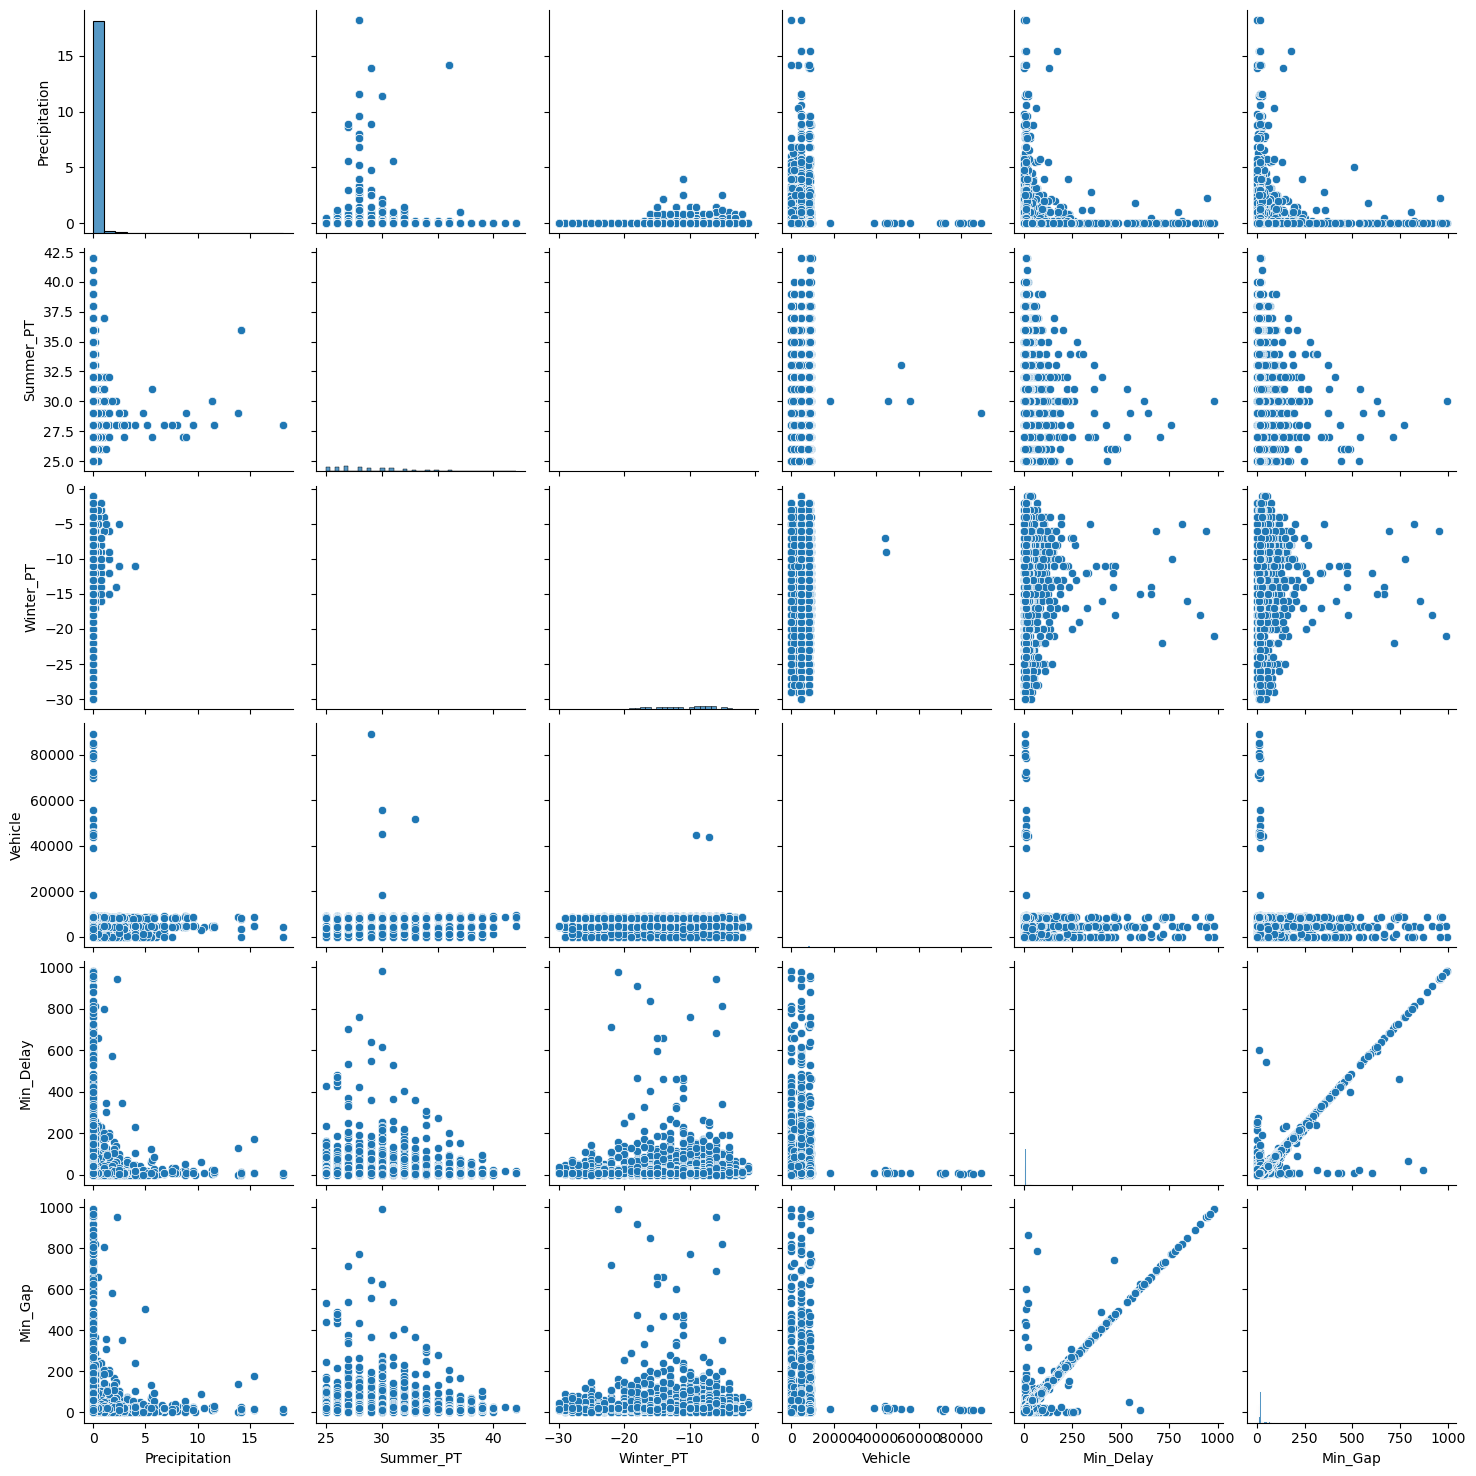

In [19]:
#looking into our first feature distribution
sns.pairplot(df)

Interesting Observations:

- There is a strong positive linear correlation in the graphs of `Min_Delay` and `Min_Gap`, indicating that as the time it takes for the streetcar to arrive increases, the subsequent train also takes longer. This correlation is logical.
- Clear days with no precipitation (0mm) show the most varied levels of delay minutes and gaps.
- Variety of outliers are visually identified across all columns.
- The current visualization makes it challenging to observe the relationship between weather data and streetcar delays.

--- 
### Let's work on the missing values

In [20]:
#Let's check out the weather null value rows
nulls = df[['Temperature', 'Precipitation', 'Wind_Speed','Visibility', 'Weather']].isna().any(axis=1)
null_slides = df[nulls].sort_values(by='Datetime')
null_slides

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
3435,2021-04-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:39:00,Thursday,14:39,506,8799,COXWELL AND LOWER GERR,Cleaning,5,10
3436,2021-04-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:41:00,Thursday,14:41,505,4586,DUNDAS AND JARVIS,Emergency Services,29,38
3437,2021-04-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:46:00,Thursday,14:46,506,4498,PARLIAMENT AND GERRARD,Held By,24,31
3438,2021-04-08 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 16:10:00,Thursday,16:10,504,8039,QUEEN AND DUNN AVE ( W,Collision - TTC Involved,6,12
7203,2021-07-19 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-19 11:02:00,Monday,11:02,501,8504,BROADVIEW AND GERRARD,Operations,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:18:00,Thursday,11:18,506,8698,PARLIAMENT AND CARLTON,Utilized Off Route,8,16
39154,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:44:00,Thursday,11:44,505,4592,DUNDAS AND MCCAUL,Emergency Services,20,30
39155,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:48:00,Thursday,11:48,506,4556,DUNDAS AND PARLIAMENT,Held By,10,20
41128,2023-08-24 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-24 17:05:00,Thursday,17:05,501,8090,ROYAL YORK AND LAKESHO,General Delay,25,31


Let's take into account that weather data is recorded hourly, while streetcar data is recorded by the occurrence time. This means that duplicated weather rows had to be created in the process of merging with streetcar data. Consequently, multiple null values may exist in the weather data, making it challenging to make logical decisions. For example, we can't check the correlation between variables to make a reasonable decision to impute when all columns have null values. However, weather data is an essential part of our analysis, so we will investigate each column to identify patterns and assess distributions in order to handle missing values.

----
### Imputing Temperature Values

In [21]:
#checking datatype
df['Temperature'].dtype

dtype('O')

In [22]:
#Temperature value counts
df['Temperature'].value_counts()

LegendMM    406
2.0         214
1.1         202
2.5         195
19.6        185
           ... 
-3.0          1
-18.0         1
-8.1          1
-9.1          1
29.2          1
Name: Temperature, Length: 897, dtype: int64

In [23]:
df['Temperature'].unique()

array(['-2.0', '-1.4', '0.4', '0.0', '0.5', '1.4', '1.5', '1.7', '2.2',
       '2.1', '2.3', '0.6', '1.2', '-1.2', '0.1', '-0.5', '1.3', '1.6',
       '1.8', '1.9', '0.8', '1.0', '0.7', '1.1', '0.9', '2.0', '-0.8',
       '-1.1', '-1.7', '0.3', '-0.6', '-1.0', '-2.1', '-2.4', '-3.0',
       '-4.7', '-7.2', '-7.4', '-7.1', '-7.3', '-5.9', '-4.5', '-4.4',
       '-4.0', '-3.6', '-4.9', '-3.4', '-4.1', '-1.5', '-1.9', '-1.8',
       '-1.3', '4.1', '3.9', '0.2', '-0.9', '-0.3', '-0.7', '-2.9',
       '-2.5', '-1.6', '-0.4', '-0.1', '3.5', '3.1', '2.9', '2.6', '3.4',
       '4.7', '3.8', '4.4', '4.5', '4.3', '3.3', '4.0', '2.5', '2.8',
       '-3.3', '-0.2', '-2.8', '-5.4', '-6.3', '-6.2', '-5.2', '-4.8',
       '-3.8', '-3.7', '-3.9', '-2.3', '3.2', '-4.2', '-5.1', '-5.7',
       '-9.9', '-10.3', '-9.7', '-7.9', '-4.6', '-5.6', '-5.8', '-5.5',
       '-2.7', '-2.6', '-2.2', '-5.0', '-3.5', '-3.2', '-6.4', '-6.1',
       '-6.9', '-11.7', '-11.8', '-10.5', '-9.6', '-8.4', '-8.0', '-6.8',
   

There are more null values than we initially checked. The label `LegendMM` is used to indicate missing values, as specified by *Environment Canada*.

In [24]:
#Replacing LegendMM values to null to work on it all together.
#Storing the new information
df['Temperature'].replace(['LegendMM'], [None], inplace=True)

In [25]:
#Sanity check
df['Temperature'].value_counts(dropna=False)

None     406
2.0      214
1.1      202
2.5      195
19.6     185
        ... 
-3.0       1
-18.0      1
-8.1       1
-9.1       1
29.2       1
Name: Temperature, Length: 898, dtype: int64

In [26]:
#Now convert Temperature datatype now that all the values are numerical. 
df['Temperature']=df['Temperature'].astype('float')

In [27]:
#Sanity check
df.Temperature.dtypes

dtype('float64')

In [28]:
#Looking at null value rows
df.loc[df.Temperature.isna(), :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
1257,2021-02-08 23:00:00,NaN,0.0,NaN,NaN,11,3.2,Snow,2021-02-08 23:46:00,Monday,23:46,504,4555,QUEEN AND BROADVIEW,Mechanical,10,20
1260,2021-02-09 02:00:00,NaN,0.0,NaN,NaN,8,11.3,Snow,2021-02-09 02:51:00,Tuesday,02:51,504,4443,KING AND BAY,Security,8,16
1262,2021-02-09 05:00:00,NaN,0.0,NaN,NaN,8,16.1,Snow,2021-02-09 05:04:00,Tuesday,05:04,511,4424,BATHURST AND COLLEGE,Held By,0,0
1263,2021-02-09 05:00:00,NaN,0.0,NaN,NaN,8,16.1,Snow,2021-02-09 05:53:00,Tuesday,05:53,512,0,ST CLAIR TO GUNN LOOP,General Delay,0,0
3435,2021-04-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:39:00,Thursday,14:39,506,8799,COXWELL AND LOWER GERR,Cleaning,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:18:00,Thursday,11:18,506,8698,PARLIAMENT AND CARLTON,Utilized Off Route,8,16
39154,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:44:00,Thursday,11:44,505,4592,DUNDAS AND MCCAUL,Emergency Services,20,30
39155,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:48:00,Thursday,11:48,506,4556,DUNDAS AND PARLIAMENT,Held By,10,20
41128,2023-08-24 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-24 17:05:00,Thursday,17:05,501,8090,ROYAL YORK AND LAKESHO,General Delay,25,31


In [29]:
#Looking at them by date 
df[df.Datetime.dt.date==pd.Timestamp(2021, 2, 9)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
1260,2021-02-09 02:00:00,NaN,0.0,NaN,NaN,8,11.3,Snow,2021-02-09 02:51:00,Tuesday,02:51,504,4443,KING AND BAY,Security,8,16
1261,2021-02-09 03:00:00,-8.2,0.0,NaN,NaN,LegendMM,4.0,Snow,2021-02-09 03:17:00,Tuesday,03:17,301,9237,LONG BRANCH LOOP,Emergency Services,0,0
1262,2021-02-09 05:00:00,NaN,0.0,NaN,NaN,8,16.1,Snow,2021-02-09 05:04:00,Tuesday,05:04,511,4424,BATHURST AND COLLEGE,Held By,0,0
1263,2021-02-09 05:00:00,NaN,0.0,NaN,NaN,8,16.1,Snow,2021-02-09 05:53:00,Tuesday,05:53,512,0,ST CLAIR TO GUNN LOOP,General Delay,0,0
1264,2021-02-09 08:00:00,-8.1,0.0,NaN,-14.0,13,LegendMM,LegendNANA,2021-02-09 08:31:00,Tuesday,08:31,501,1102,HUMBER LOOP,Mechanical,6,12
1265,2021-02-09 12:00:00,-3.6,0.0,NaN,-8.0,11,16.1,LegendNANA,2021-02-09 12:58:00,Tuesday,12:58,504,1006,DUNDAS WEST STATION,Operations,4,8
1266,2021-02-09 13:00:00,-2.7,0.0,NaN,-7.0,13,16.1,LegendNANA,2021-02-09 13:16:00,Tuesday,13:16,506,4465,COLLEGE AND SPADINA,Held By,8,15
1267,2021-02-09 13:00:00,-2.7,0.0,NaN,-7.0,13,16.1,LegendNANA,2021-02-09 13:54:00,Tuesday,13:54,505,4506,PARLIAMENT AND DUNDAS,Operations,7,14
1268,2021-02-09 14:00:00,-2.9,0.0,NaN,-7.0,11,16.1,LegendNANA,2021-02-09 14:04:00,Tuesday,14:04,501,1273,QUEEN AND RONCESVALLES,Operations,7,14
1269,2021-02-09 14:00:00,-2.9,0.0,NaN,-7.0,11,16.1,LegendNANA,2021-02-09 14:50:00,Tuesday,14:50,504,4422,KING AND DUFFERIN,Held By,19,26


In [30]:
df[df.Datetime.dt.date==pd.Timestamp(2023, 6, 29)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
39136,2023-06-29 05:00:00,13.5,0.0,NaN,NaN,8.0,16.1,LegendNANA,2023-06-29 05:23:00,Thursday,05:23,512,4558,VAUGHAN AND ST CLAIR,Rail/Switches,0,0
39137,2023-06-29 05:00:00,13.5,0.0,NaN,NaN,8.0,16.1,LegendNANA,2023-06-29 05:34:00,Thursday,05:34,501,8116,QUEEN AND DUFFERIN,Mechanical,9,13
39138,2023-06-29 06:00:00,15.2,0.0,NaN,NaN,5.0,16.1,LegendNANA,2023-06-29 06:53:00,Thursday,06:53,501,8388,QUEEN AND JARVIS,Security,6,12
39139,2023-06-29 08:00:00,18.8,0.0,NaN,NaN,5.0,16.1,LegendNANA,2023-06-29 08:19:00,Thursday,08:19,506,4425,COLLEGE AND GRACE,General Delay,10,20
39140,2023-06-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:03:00,Thursday,10:03,510,4544,QUEENS QUAY AND REES,General Delay,10,20
39141,2023-06-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:12:00,Thursday,10:12,501,4585,QUEEN AND GREENWOOD,Held By,35,44
39142,2023-06-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:13:00,Thursday,10:13,506,4425,QUEEN AND HILTZ,Collision - TTC Involved,30,40
39143,2023-06-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:16:00,Thursday,10:16,505,4486,DUNDAS AND RONCESVALLE,Operations,46,56
39144,2023-06-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:21:00,Thursday,10:21,501,0,QUEEN AND HILTZ,Diversion,7,14
39145,2023-06-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:22:00,Thursday,10:22,505,4503,QUEEN AND GREENWOOD,Held By,31,41


Thankfully, it appears that there isn't an entire day without the temperature value. When looking into a one-day timestamp dataframe, it becomes clear that we could use `ffill` method to impute the missing values since temperature does not significantly change between hours. For example, on June 29, 2023, there are 16 null values but in reality, there are only 2 missing values that occurred between 10-11 am.

In [31]:
#Imputating
df['Temperature']=df['Temperature'].ffill(axis=0)

In [32]:
#Checking if the null values are filled.
print(f'Temperature missing value is now at {df.Temperature.isna().sum()}.')

Temperature missing value is now at 0.


Text(0, 0.5, 'Temperature °C')

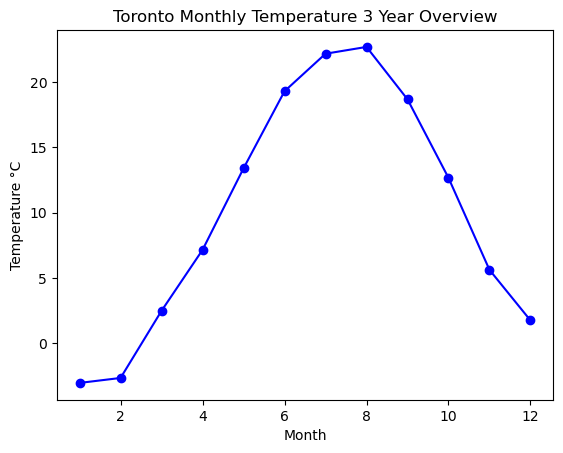

In [33]:
#looking into temperature changes in Toronto 
df.groupby(df['Datetime'].dt.month)['Temperature'].mean().round(2).plot(color='blue', marker='o')
plt.title('Toronto Monthly Temperature 3 Year Overview')
plt.xlabel('Month')
plt.ylabel('Temperature °C')

----
### Imputing Precipitation Values

In [34]:
#checking datatype
df.Precipitation.dtypes

dtype('float64')

In [35]:
#looking at unique values
df.Precipitation.value_counts(dropna=False)

0.0     39326
0.2       956
0.5       490
0.8       340
1.0       210
1.5       178
1.2       120
1.8        76
2.0        73
2.5        70
NaN        64
2.2        57
3.2        40
4.0        33
3.0        33
2.8        19
3.8        14
4.5        13
3.5        11
4.3         9
3.3         9
5.5         8
4.8         7
5.3         7
5.0         7
6.8         7
5.8         6
8.8         6
14.2        5
9.6         5
1.3         5
7.8         5
2.3         5
11.6        4
7.6         4
11.4        4
15.4        4
5.2         4
6.0         4
8.6         3
4.2         3
0.1         3
13.9        2
9.0         2
5.6         2
8.9         2
8.0         2
18.2        2
10.6        1
6.3         1
10.3        1
1.4         1
9.8         1
6.6         1
Name: Precipitation, dtype: int64

In [36]:
df.Precipitation.isna().sum()

64

No hidden null values identified as the null value is same as what we alrady checked: 64 rows.

In [37]:
#checking null value rows
df.loc[df.Precipitation.isna(), :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
3435,2021-04-08 14:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:39:00,Thursday,14:39,506,8799,COXWELL AND LOWER GERR,Cleaning,5,10
3436,2021-04-08 14:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:41:00,Thursday,14:41,505,4586,DUNDAS AND JARVIS,Emergency Services,29,38
3437,2021-04-08 14:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:46:00,Thursday,14:46,506,4498,PARLIAMENT AND GERRARD,Held By,24,31
3438,2021-04-08 16:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 16:10:00,Thursday,16:10,504,8039,QUEEN AND DUNN AVE ( W,Collision - TTC Involved,6,12
7203,2021-07-19 11:00:00,26.3,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-19 11:02:00,Monday,11:02,501,8504,BROADVIEW AND GERRARD,Operations,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,2023-06-29 11:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:18:00,Thursday,11:18,506,8698,PARLIAMENT AND CARLTON,Utilized Off Route,8,16
39154,2023-06-29 11:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:44:00,Thursday,11:44,505,4592,DUNDAS AND MCCAUL,Emergency Services,20,30
39155,2023-06-29 11:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:48:00,Thursday,11:48,506,4556,DUNDAS AND PARLIAMENT,Held By,10,20
41128,2023-08-24 17:00:00,18.5,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-24 17:05:00,Thursday,17:05,501,8090,ROYAL YORK AND LAKESHO,General Delay,25,31


In [38]:
#I see multiple rows on 2021-4-8
#checking the rest of precipiation value on that date
df[df.Datetime.dt.date==pd.Timestamp(2021, 4, 8)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
3397,2021-04-08 02:00:00,10.3,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 02:09:00,Thursday,02:09,306,4458,DUNDAS WEST STATION,Emergency Services,9,18
3398,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:43:00,Thursday,04:43,505,4590,RONCESVALLES YARD,Operations,10,20
3399,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:43:00,Thursday,04:43,506,4483,RONCESVALLES YARD,Operations,4,12
3400,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:43:00,Thursday,04:43,506,4505,RONCESVALLES YARD,Operations,8,16
3401,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:52:00,Thursday,04:52,512,4447,HOWARD PARK AND DUNDAS,Operations,0,38
3402,2021-04-08 05:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 05:00:00,Thursday,05:00,501,4412,DUNDAS WEST STATION,Held By,0,20
3403,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:35:00,Thursday,06:35,501,0,QUEENSWAY AND RONCESVA,Operations,7,13
3404,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:37:00,Thursday,06:37,501,4534,QUEEN AND YONGE,Cleaning,7,14
3406,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:52:00,Thursday,06:52,506,3211,COXWELL AND LOWER GERR,General Delay,10,15
3407,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:56:00,Thursday,06:56,501,0,QUEENSWAY AND RONCESVA,Operations,8,16


In [39]:
#one more check
df[df.Datetime.dt.date==pd.Timestamp(2023, 6, 29)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
39136,2023-06-29 05:00:00,13.5,0.0,NaN,NaN,8.0,16.1,LegendNANA,2023-06-29 05:23:00,Thursday,05:23,512,4558,VAUGHAN AND ST CLAIR,Rail/Switches,0,0
39137,2023-06-29 05:00:00,13.5,0.0,NaN,NaN,8.0,16.1,LegendNANA,2023-06-29 05:34:00,Thursday,05:34,501,8116,QUEEN AND DUFFERIN,Mechanical,9,13
39138,2023-06-29 06:00:00,15.2,0.0,NaN,NaN,5.0,16.1,LegendNANA,2023-06-29 06:53:00,Thursday,06:53,501,8388,QUEEN AND JARVIS,Security,6,12
39139,2023-06-29 08:00:00,18.8,0.0,NaN,NaN,5.0,16.1,LegendNANA,2023-06-29 08:19:00,Thursday,08:19,506,4425,COLLEGE AND GRACE,General Delay,10,20
39140,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:03:00,Thursday,10:03,510,4544,QUEENS QUAY AND REES,General Delay,10,20
39141,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:12:00,Thursday,10:12,501,4585,QUEEN AND GREENWOOD,Held By,35,44
39142,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:13:00,Thursday,10:13,506,4425,QUEEN AND HILTZ,Collision - TTC Involved,30,40
39143,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:16:00,Thursday,10:16,505,4486,DUNDAS AND RONCESVALLE,Operations,46,56
39144,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:21:00,Thursday,10:21,501,0,QUEEN AND HILTZ,Diversion,7,14
39145,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:22:00,Thursday,10:22,505,4503,QUEEN AND GREENWOOD,Held By,31,41


Coincidentally, we see a relationship between `Precipiation` and `Visibility` variables. When precipiation is at 0mm, visibility is mostly at 16.1km. Let's dig deeper in this.

### Exploring Visibility Values

In [40]:
#checking datatype 
df['Visibility'].dtypes

dtype('O')

In [41]:
#looking at unique values
df.Visibility.unique()

array(['16.1', '3.2', '6.4', '8.1', '9.7', '2.4', '2.8', '14.5', '11.3',
       '12.9', '4.8', '4.0', '0.6', '0.8', '1.0', '0.4', 'LegendMM',
       '3.6', '2.0', '1.6', nan, '1.2', '0.2', '0.0'], dtype=object)

In [42]:
#Toal number of missing values
df.Visibility.isna().sum()

64

There is more than 64 missing values here under the label `LegendMM`.

In [43]:
#Getting rid of string value(LegendMM)
#Replacing inplace
df['Visibility'].replace(['LegendMM'], [None], inplace=True)

In [44]:
#looking at null value counts
df['Visibility'].value_counts(dropna=False)

16.1    37742
9.7       525
12.9      514
14.5      435
4.8       419
6.4       418
8.1       415
11.3      401
4.0       194
2.8       162
3.2       150
2.4       114
2.0       112
1.6        92
1.2        90
0.6        85
0.4        79
3.6        76
NaN        64
0.2        61
0.8        55
1.0        33
None       21
0.0         8
Name: Visibility, dtype: int64

In [45]:
#checking null value rows
df.loc[df.Visibility.isna(), :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
1264,2021-02-09 08:00:00,-8.1,0.0,NaN,-14.0,13,None,LegendNANA,2021-02-09 08:31:00,Tuesday,08:31,501,1102,HUMBER LOOP,Mechanical,6,12
3435,2021-04-08 14:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:39:00,Thursday,14:39,506,8799,COXWELL AND LOWER GERR,Cleaning,5,10
3436,2021-04-08 14:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:41:00,Thursday,14:41,505,4586,DUNDAS AND JARVIS,Emergency Services,29,38
3437,2021-04-08 14:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:46:00,Thursday,14:46,506,4498,PARLIAMENT AND GERRARD,Held By,24,31
3438,2021-04-08 16:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 16:10:00,Thursday,16:10,504,8039,QUEEN AND DUNN AVE ( W,Collision - TTC Involved,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39154,2023-06-29 11:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:44:00,Thursday,11:44,505,4592,DUNDAS AND MCCAUL,Emergency Services,20,30
39155,2023-06-29 11:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:48:00,Thursday,11:48,506,4556,DUNDAS AND PARLIAMENT,Held By,10,20
39156,2023-06-29 13:00:00,22.5,0.0,NaN,NaN,13.0,None,LegendNANA,2023-06-29 13:26:00,Thursday,13:26,501,8190,CHURCH AND KING,Operations,6,12
41128,2023-08-24 17:00:00,18.5,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-24 17:05:00,Thursday,17:05,501,8090,ROYAL YORK AND LAKESHO,General Delay,25,31


In [46]:
#let's see what the weather was like in 2021-02-09
df[df.Datetime.dt.date==pd.Timestamp(2021, 2, 9)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
1260,2021-02-09 02:00:00,-11.0,0.0,NaN,NaN,8,11.3,Snow,2021-02-09 02:51:00,Tuesday,02:51,504,4443,KING AND BAY,Security,8,16
1261,2021-02-09 03:00:00,-8.2,0.0,NaN,NaN,LegendMM,4.0,Snow,2021-02-09 03:17:00,Tuesday,03:17,301,9237,LONG BRANCH LOOP,Emergency Services,0,0
1262,2021-02-09 05:00:00,-8.2,0.0,NaN,NaN,8,16.1,Snow,2021-02-09 05:04:00,Tuesday,05:04,511,4424,BATHURST AND COLLEGE,Held By,0,0
1263,2021-02-09 05:00:00,-8.2,0.0,NaN,NaN,8,16.1,Snow,2021-02-09 05:53:00,Tuesday,05:53,512,0,ST CLAIR TO GUNN LOOP,General Delay,0,0
1264,2021-02-09 08:00:00,-8.1,0.0,NaN,-14.0,13,None,LegendNANA,2021-02-09 08:31:00,Tuesday,08:31,501,1102,HUMBER LOOP,Mechanical,6,12
1265,2021-02-09 12:00:00,-3.6,0.0,NaN,-8.0,11,16.1,LegendNANA,2021-02-09 12:58:00,Tuesday,12:58,504,1006,DUNDAS WEST STATION,Operations,4,8
1266,2021-02-09 13:00:00,-2.7,0.0,NaN,-7.0,13,16.1,LegendNANA,2021-02-09 13:16:00,Tuesday,13:16,506,4465,COLLEGE AND SPADINA,Held By,8,15
1267,2021-02-09 13:00:00,-2.7,0.0,NaN,-7.0,13,16.1,LegendNANA,2021-02-09 13:54:00,Tuesday,13:54,505,4506,PARLIAMENT AND DUNDAS,Operations,7,14
1268,2021-02-09 14:00:00,-2.9,0.0,NaN,-7.0,11,16.1,LegendNANA,2021-02-09 14:04:00,Tuesday,14:04,501,1273,QUEEN AND RONCESVALLES,Operations,7,14
1269,2021-02-09 14:00:00,-2.9,0.0,NaN,-7.0,11,16.1,LegendNANA,2021-02-09 14:50:00,Tuesday,14:50,504,4422,KING AND DUFFERIN,Held By,19,26


In [47]:
#one more
df[df.Datetime.dt.date==pd.Timestamp(2023, 6, 29)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
39136,2023-06-29 05:00:00,13.5,0.0,NaN,NaN,8.0,16.1,LegendNANA,2023-06-29 05:23:00,Thursday,05:23,512,4558,VAUGHAN AND ST CLAIR,Rail/Switches,0,0
39137,2023-06-29 05:00:00,13.5,0.0,NaN,NaN,8.0,16.1,LegendNANA,2023-06-29 05:34:00,Thursday,05:34,501,8116,QUEEN AND DUFFERIN,Mechanical,9,13
39138,2023-06-29 06:00:00,15.2,0.0,NaN,NaN,5.0,16.1,LegendNANA,2023-06-29 06:53:00,Thursday,06:53,501,8388,QUEEN AND JARVIS,Security,6,12
39139,2023-06-29 08:00:00,18.8,0.0,NaN,NaN,5.0,16.1,LegendNANA,2023-06-29 08:19:00,Thursday,08:19,506,4425,COLLEGE AND GRACE,General Delay,10,20
39140,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:03:00,Thursday,10:03,510,4544,QUEENS QUAY AND REES,General Delay,10,20
39141,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:12:00,Thursday,10:12,501,4585,QUEEN AND GREENWOOD,Held By,35,44
39142,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:13:00,Thursday,10:13,506,4425,QUEEN AND HILTZ,Collision - TTC Involved,30,40
39143,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:16:00,Thursday,10:16,505,4486,DUNDAS AND RONCESVALLE,Operations,46,56
39144,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:21:00,Thursday,10:21,501,0,QUEEN AND HILTZ,Diversion,7,14
39145,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:22:00,Thursday,10:22,505,4503,QUEEN AND GREENWOOD,Held By,31,41


In [48]:
#Checking the proportion of missing values out of whole dataframe
df['Visibility'].isna().sum()/df.shape[0]*100

0.20111203123151544

On June 29, 2023, a significant number of missing values is observed in the `Visibility` column, but they are specifically present between 10 am and 1 pm. Following a similar approach as we did for `Temperature`, we can assume that visibility will not significantly change within this time frame. Therefore, we will impute the missing values using the `ffill` method. It's worth noting that these rows represent only 0.20% of the entire dataset, so the impact on the overall dataset will be minimal.

In [49]:
#Imputing
df['Visibility']=df['Visibility'].ffill(axis=0)

In [50]:
#checking
print(f'Visibility missing value is now at {df.Visibility.isna().sum()}.')

Visibility missing value is now at 0.


In [51]:
#Now, let's convert datatype
df['Visibility']=df['Visibility'].astype('float')

In [52]:
#checking
df.Visibility.dtype

dtype('float64')

### Back to Precipitation Imputation

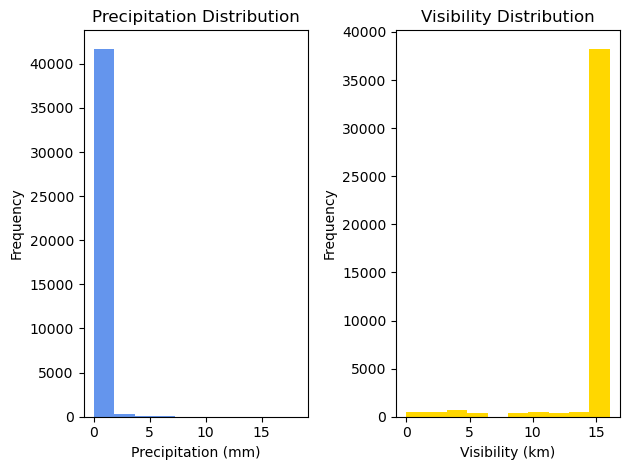

In [53]:
#Checking the distribution between Precipitation and Visibility
plt.figure()

plt.subplot(1, 2, 1)
plt.hist(df['Precipitation'], color='cornflowerblue')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.title('Precipitation Distribution')

plt.subplot(1, 2, 2)
plt.hist(df['Visibility'], color='gold')
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')
plt.title('Visibility Distribution')

plt.tight_layout()
plt.show()

As mentioned before, the histogram provides a reliable reason for imputing `Precipitation` values based on `Visibility`. We will first fill in precipitation as 0.0 mm when visibility is at 16.1 km, and then we will use `ffill` method to impute the remaining missing rows.

In [54]:
#Imputating to 0.0mm
condition1 = df['Visibility'] == 16.1
df.loc[condition1, 'Precipitation'] = df.loc[condition1, 'Precipitation'].fillna(0.0)

In [55]:
#the rest of the missing values
df['Precipitation']=df['Precipitation'].ffill(axis=0)

In [56]:
#checking
df.Precipitation.value_counts(dropna=False)

0.0     39390
0.2       956
0.5       490
0.8       340
1.0       210
1.5       178
1.2       120
1.8        76
2.0        73
2.5        70
2.2        57
3.2        40
3.0        33
4.0        33
2.8        19
3.8        14
4.5        13
3.5        11
4.3         9
3.3         9
5.5         8
6.8         7
5.3         7
5.0         7
4.8         7
5.8         6
8.8         6
2.3         5
14.2        5
9.6         5
1.3         5
7.8         5
11.6        4
7.6         4
11.4        4
15.4        4
5.2         4
6.0         4
8.6         3
4.2         3
0.1         3
13.9        2
9.0         2
5.6         2
8.9         2
8.0         2
18.2        2
10.6        1
6.3         1
10.3        1
1.4         1
9.8         1
6.6         1
Name: Precipitation, dtype: int64

In [57]:
#No missing values 
print(f'Precipitation missing value is now at {df.Precipitation.isna().sum()}.')

Precipitation missing value is now at 0.


----
### Imputing Weather Values

Let's look into the `Weather` variable. This is the most important column, as the project's focus is to find a correlation between TTC streetcar delays and the city's weather conditions.

In [58]:
#checking datatype
df.Weather.dtypes

dtype('O')

In [59]:
#Checking for hidden nulls values
df.Weather.value_counts(dropna=False)

LegendNANA                          36322
Rain                                 1869
Snow                                 1658
Fog                                   964
Rain, Fog                             784
Haze                                  250
NaN                                    64
Thunderstorms                          52
Moderate Rain, Fog                     49
Moderate Snow                          48
Thunderstorms, Rain                    43
Rain, Snow                             34
Moderate Rain                          25
Snow,Blowing Snow                      19
Heavy Snow                             17
Freezing Rain, Fog                     12
Heavy Rain, Fog                         9
Thunderstorms, Rain, Fog                9
Thunderstorms,Moderate Rain             8
Thunderstorms,Heavy Rain, Fog           5
Thunderstorms, Fog                      5
Thunderstorms,Moderate Rain, Fog        5
Freezing Rain, Snow                     4
Heavy Rain                        

So there is roughly, 36,000 hidden values.

This is the most crucial variable in this analysis, so we will find ways to impute on the missing dataset

In [60]:
#Looking at all the null value rows 

empty = df[(df.Weather.isna()) | (df.Weather=='LegendNANA')]
empty.sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
48,2021-01-01 01:00:00,-1.2,0.0,NaN,-3.0,4,16.1,LegendNANA,2021-01-01 01:18:00,Friday,01:18,504,4519,KING AND RIVER,Operations,10,20
0,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,LegendNANA,2021-01-01 03:15:00,Friday,03:15,501,4574,QUEEN AND MCCAUL,Operations,19,24
1,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,LegendNANA,2021-01-01 03:37:00,Friday,03:37,504,4500,BROADVIEW AND QUEEN,Operations,15,30
2,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5,16.1,LegendNANA,2021-01-01 04:00:00,Friday,04:00,504,4589,BROADVIEW STATION,Cleaning,15,30
3,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5,16.1,LegendNANA,2021-01-01 04:03:00,Friday,04:03,504,4582,DUNDAS WEST STATION,Cleaning,15,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42392,2023-09-30 21:00:00,16.6,0.0,NaN,NaN,8,16.1,LegendNANA,2023-09-30 21:14:00,Saturday,21:14,513,8739,QUEEN AND BERTI,Security,10,20
42396,2023-09-30 22:00:00,16.6,0.0,NaN,NaN,4,16.1,LegendNANA,2023-09-30 22:05:00,Saturday,22:05,505,4552,QUEEN AND KINGSTON,Operations,10,20
42397,2023-09-30 22:00:00,16.6,0.0,NaN,NaN,4,16.1,LegendNANA,2023-09-30 22:53:00,Saturday,22:53,511,4593,FLEET AND MANITOBA,Diversion,44,54
42398,2023-09-30 23:00:00,16.9,0.0,NaN,NaN,4,16.1,LegendNANA,2023-09-30 23:21:00,Saturday,23:21,505,4503,KINGSTON RD LOOP,Security,10,20


In [61]:
#Let's see if we can find useful patterns
df[df.Datetime.dt.date==pd.Timestamp(2021, 4,8)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
3397,2021-04-08 02:00:00,10.3,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 02:09:00,Thursday,02:09,306,4458,DUNDAS WEST STATION,Emergency Services,9,18
3398,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:43:00,Thursday,04:43,505,4590,RONCESVALLES YARD,Operations,10,20
3399,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:43:00,Thursday,04:43,506,4483,RONCESVALLES YARD,Operations,4,12
3400,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:43:00,Thursday,04:43,506,4505,RONCESVALLES YARD,Operations,8,16
3401,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:52:00,Thursday,04:52,512,4447,HOWARD PARK AND DUNDAS,Operations,0,38
3402,2021-04-08 05:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 05:00:00,Thursday,05:00,501,4412,DUNDAS WEST STATION,Held By,0,20
3403,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:35:00,Thursday,06:35,501,0,QUEENSWAY AND RONCESVA,Operations,7,13
3404,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:37:00,Thursday,06:37,501,4534,QUEEN AND YONGE,Cleaning,7,14
3406,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:52:00,Thursday,06:52,506,3211,COXWELL AND LOWER GERR,General Delay,10,15
3407,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:56:00,Thursday,06:56,501,0,QUEENSWAY AND RONCESVA,Operations,8,16


Wow, so the whole row in weather column is empty. However, we can make some reasonable assumptions based on other available data.

Coincidentally, the `Visibility` column maintains the same value throughout the day, and the `Precipitation` column tells us that there was no rain on this day. Additionally, the `Wind Speed` column indicates relatively steady wind speeds ranging from 28 km to 40 km. According to [*The Beaufort Wind Scale*](http://www.greenmansoftware.co.uk/products/fieldnotes/documentation/answers/measurements/beaufort.htm), when the wind speed is between 30-39 km/h, it is labeled as 'Fresh breeze.'

Referring to [*TurkishStraits*](http://www.turkishstraits.com/info/visibilitytable) for visibility conditions, we can make the following assumptions based on the available data:

- High Visibility (e.g., 10 km or more):
    - Clear skies: High visibility is often associated with good weather conditions because it offers good visibility.

- Moderate Visibility (e.g., 5-10 km):

    - Cloudy: Moderate visibility may suggest partially cloudy conditions.
    - Haze: Hazy conditions can reduce visibility, so it might indicate a hazy day.

- Low Visibility (e.g., less than 5 km):

    - Foggy: Low visibility is commonly associated with foggy conditions.
    - Rainy or drizzle: Poor visibility can be caused by rain or drizzle.
    - Snowy: Low visibility can be an indicator of snowfall.
    
Based on these guidelines, we can logically fill in the `Weather` column. It's also worth noting that there are no clear, sunny, or cloudy days among the weather conditions so we can reasonably assume that the majority of missing values may correspond to one of these weather conditions.

----

In [62]:
#quickly convert windspeed to float
df.Wind_Speed.dtype

dtype('O')

In [63]:
#we have to work on the string value ==LegendMM
df.Wind_Speed.value_counts()

13          3256
11          3197
15          3126
9           3117
17          3078
18          2900
8           2665
21          2412
22          2266
24          1994
26          1958
5           1861
28          1553
30          1281
32          1130
4           1059
34           896
35           704
37           621
0            539
39           537
41           370
43           323
45           287
46           222
48           103
50           102
52            88
54            67
13.0          44
15.0          36
17.0          34
55            33
11.0          28
59            27
9.0           27
8.0           21
30.0          21
18.0          18
39.0          16
28.0          14
32.0          14
26.0          14
58            14
LegendMM      14
4.0           14
37.0          11
21.0          10
5.0           10
63             9
68             9
24.0           9
35.0           8
61             7
71             5
34.0           5
41.0           5
22.0           5
0.0           

In [64]:
#how many nulls?
df.Wind_Speed.isna().sum()

64

There are only 78 rows of null values here, just drop as we don't really need this column other than to impute the weather column.

In [65]:
#dropping
drops = df.loc[(df['Wind_Speed'].isna()) | (df['Wind_Speed'] == 'LegendMM')]
df.drop(drops.index, axis=0, inplace=True)

In [66]:
#checking
df[(df['Wind_Speed'].isna()) | (df['Wind_Speed'] == 'LegendMM')]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap


In [67]:
#now let's convert!
df['Wind_Speed'] = df['Wind_Speed'].astype(float)
#checking
df.Wind_Speed.dtypes

dtype('float64')

---

In [68]:
#now, back to weather imputation

#Checking the distribution
#Percentage of missing values('LegendNANA') when wind speed is between 0-40km

goodday = df[(df['Visibility']==16.1) & (df['Weather'] == 'LegendNANA')]
norain = df[(df['Precipitation']==0.0) & (df['Weather'] == 'LegendNANA')]
breeze = df[(df['Wind_Speed'].between(0, 40)) & (df['Weather'] == 'LegendNANA')]

print(f'Good Visibility days account for ---> {goodday.shape[0]/df.shape[0]*100}%')
print(f'Dry days account for ---> {norain.shape[0]/df.shape[0]*100}%')
print(f'Breezy days account for ---> {breeze.shape[0] / df.shape[0] * 100}%')

Good Visibility days account for ---> 84.01403275890678%
Dry days account for ---> 84.9716737383554%
Breezy days account for ---> 83.04453978713822%


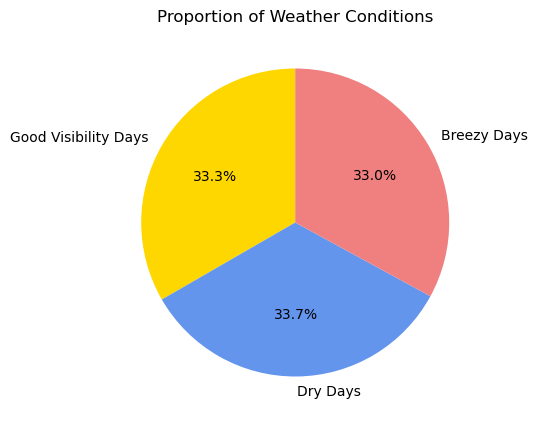

In [69]:
#visualizing the distribution between 3 conditions when weather condition is null
labels = ['Good Visibility Days', 'Dry Days', 'Breezy Days']
sizes = [
    goodday.shape[0] / df.shape[0] * 100,
    norain.shape[0] / df.shape[0] * 100,
    breeze.shape[0] / df.shape[0] * 100
]

#pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['gold','cornflowerblue','lightcoral'])
plt.title('Proportion of Weather Conditions')
plt.show()

So, based on this exploration, we discovered that 84% of the weather null values occured when there is no rain, has fresh freeze, and has good visibility. Considering that there are no clear or cloudy days among the values in weather conditions, we can logically guess that the 85% of null values here could be clear sky or cloudy days. Let's proceed with imputation.

In [70]:
#Let's impuate using this 
df[df['Weather'] == 'LegendNANA'].groupby('Visibility')['Weather'].count()

Visibility
1.6         3
2.0         3
4.8         3
11.3      232
12.9      327
14.5      300
16.1    35443
Name: Weather, dtype: int64

Just quickly impute the null values where there is only 3 rows each. 

In [71]:
df[(df.Visibility==1.6) & (df.Weather=='LegendNANA')]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
34513,2023-03-03 21:00:00,0.4,1.5,NaN,NaN,55.0,1.6,LegendNANA,2023-03-03 21:10:00,Friday,21:10,504,3518,DUNDAS WEST STATION,Collision - TTC Involved,10,20
34514,2023-03-03 21:00:00,0.4,1.5,NaN,NaN,55.0,1.6,LegendNANA,2023-03-03 21:17:00,Friday,21:17,512,4558,ST CLAIR AND DUFFERIN,Held By,8,18
34515,2023-03-03 21:00:00,0.4,1.5,NaN,NaN,55.0,1.6,LegendNANA,2023-03-03 21:56:00,Friday,21:56,504,4460,BROADVIEW AND QUEEN,Operations,10,20


In [72]:
df[(df.Visibility==2.0) & (df.Weather=='LegendNANA')]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
34516,2023-03-03 22:00:00,0.4,3.5,NaN,NaN,58.0,2.0,LegendNANA,2023-03-03 22:12:00,Friday,22:12,504,4592,KING AND PARLIAMENT,Operations,10,20
34517,2023-03-03 22:00:00,0.4,3.5,NaN,NaN,58.0,2.0,LegendNANA,2023-03-03 22:16:00,Friday,22:16,504,4529,DUNDAS AND PARLIAMENT,Operations,10,20
34518,2023-03-03 22:00:00,0.4,3.5,NaN,NaN,58.0,2.0,LegendNANA,2023-03-03 22:32:00,Friday,22:32,505,4512,GERRAND AND BROADVIEW,Operations,10,20


In [73]:
#both null values are located on 2023-3-3
df[df.Datetime.dt.date==pd.Timestamp(2023, 3,3)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
34497,2023-03-03 02:00:00,0.1,0.0,NaN,NaN,11.0,16.1,LegendNANA,2023-03-03 02:57:00,Friday,02:57,501,1409,QUEEN AND KINGSTON,Security,11,31
34498,2023-03-03 04:00:00,-1.1,0.0,NaN,-7.0,26.0,16.1,LegendNANA,2023-03-03 04:13:00,Friday,04:13,501,1034,NEVILLE LOOP,Security,0,0
34499,2023-03-03 05:00:00,-1.3,0.0,NaN,-7.0,24.0,16.1,LegendNANA,2023-03-03 05:34:00,Friday,05:34,501,4603,QUEEN AND RONCESVALLES,Security,9,18
34500,2023-03-03 06:00:00,-1.2,0.0,NaN,-8.0,28.0,16.1,LegendNANA,2023-03-03 06:15:00,Friday,06:15,501,1353,WESTON AND SENECA,Mechanical,5,10
34501,2023-03-03 07:00:00,0.4,0.0,NaN,NaN,28.0,16.1,LegendNANA,2023-03-03 07:35:00,Friday,07:35,503,9207,BINGHAM LOOP,Mechanical,8,16
34502,2023-03-03 08:00:00,0.3,0.0,NaN,NaN,30.0,16.1,LegendNANA,2023-03-03 08:04:00,Friday,08:04,506,4584,COLLEGE AND QUEENS PAR,Collision - TTC Involved,9,18
34503,2023-03-03 08:00:00,0.3,0.0,NaN,NaN,30.0,16.1,LegendNANA,2023-03-03 08:12:00,Friday,08:12,510,4601,QUEENS QUAY,Security,8,16
34504,2023-03-03 08:00:00,0.3,0.0,NaN,NaN,30.0,16.1,LegendNANA,2023-03-03 08:35:00,Friday,08:35,504,8104,DUFFERIN AND KING,Operations,5,10
34505,2023-03-03 09:00:00,0.2,0.0,NaN,NaN,39.0,16.1,LegendNANA,2023-03-03 09:42:00,Friday,09:42,510,4580,CHARLOTTE AND ADELAIDE,Security,0,0
34506,2023-03-03 12:00:00,1.0,0.0,NaN,NaN,39.0,16.1,LegendNANA,2023-03-03 12:23:00,Friday,12:23,512,4521,YONGE AND ST CLAIR,Collision - TTC Involved,8,16


On March 3, 2023, the visibility drops to 1.6 km, and the precipitation value changes accordingly. Taking this fact into account, let's fill in the null values with a condition set when we work on rows with larger value counts.

In [74]:
#right now, there are only 3 rows to fill each, so let's handle this now
#fill in 'snow' when visibility is 1.6
condition= df.Visibility == 1.6
df.loc[condition, 'Weather'] = df.loc[condition, 'Weather'].replace('LegendNANA', 'Snow')

In [75]:
#fill in 'snow' when visibility is 2.0
condition1= df.Visibility == 2.0
df.loc[condition1, 'Weather'] = df.loc[condition1, 'Weather'].replace('LegendNANA', 'Snow')

In [76]:
#How does this look?
df[(df.Visibility==4.8) & (df.Weather=='LegendNANA')]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
23198,2022-05-27 09:00:00,14.2,0.0,NaN,NaN,17.0,4.8,LegendNANA,2022-05-27 09:26:00,Friday,09:26,504,1106,KING AND PARLIAMENT,Emergency Services,5,10
23199,2022-05-27 10:00:00,14.5,0.2,NaN,NaN,5.0,4.8,LegendNANA,2022-05-27 10:12:00,Friday,10:12,504,8374,EXHIBITION LOOP,Mechanical,5,10
23200,2022-05-27 10:00:00,14.5,0.2,NaN,NaN,5.0,4.8,LegendNANA,2022-05-27 10:59:00,Friday,10:59,501,8641,QUEEN AND UNIVERSITY,Mechanical,10,20


In [77]:
df[df.Datetime.dt.date==pd.Timestamp(2022, 5,27)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
23190,2022-05-27 02:00:00,15.1,0.0,NaN,NaN,8.0,16.1,LegendNANA,2022-05-27 02:32:00,Friday,02:32,510,4446,KINGSTON RD LOOP,Security,0,0
23191,2022-05-27 05:00:00,13.8,0.2,NaN,NaN,5.0,16.1,Rain,2022-05-27 05:23:00,Friday,05:23,505,4587,DUNDAS AND REGENT ST,Security,13,22
23192,2022-05-27 05:00:00,13.8,0.2,NaN,NaN,5.0,16.1,Rain,2022-05-27 05:46:00,Friday,05:46,512,4456,ST CLAIR STATION,Late Entering Service,10,24
23193,2022-05-27 06:00:00,14.5,0.8,NaN,NaN,5.0,16.1,Rain,2022-05-27 06:40:00,Friday,06:40,505,4431,PARKSIDE DR AND HOWARD,Held By,11,19
23194,2022-05-27 06:00:00,14.5,0.8,NaN,NaN,5.0,16.1,Rain,2022-05-27 06:44:00,Friday,06:44,506,4598,HIGH PARK LOOP,Security,10,19
23195,2022-05-27 07:00:00,13.9,0.8,NaN,NaN,5.0,1.2,Rain,2022-05-27 07:19:00,Friday,07:19,512,4595,ST CLAIR WEST STATION,Operations,5,10
23196,2022-05-27 08:00:00,14.2,0.0,NaN,NaN,9.0,2.8,"Rain, Fog",2022-05-27 08:13:00,Friday,08:13,501,4501,QUEEN AND WOODFIELD,Emergency Services,9,16
23197,2022-05-27 08:00:00,14.2,0.0,NaN,NaN,9.0,2.8,"Rain, Fog",2022-05-27 08:50:00,Friday,08:50,501,8641,LAKESHORE AND FLEECELI,Diversion,99,108
23198,2022-05-27 09:00:00,14.2,0.0,NaN,NaN,17.0,4.8,LegendNANA,2022-05-27 09:26:00,Friday,09:26,504,1106,KING AND PARLIAMENT,Emergency Services,5,10
23199,2022-05-27 10:00:00,14.5,0.2,NaN,NaN,5.0,4.8,LegendNANA,2022-05-27 10:12:00,Friday,10:12,504,8374,EXHIBITION LOOP,Mechanical,5,10


In this dataframe, we will note that when precipitation has a value of 0.0 mm and visibility is below 4.8km, we can replace `Rain, Fog` with `Fog` because it didn't rain. So we will replace this null value to `Fog` as well.

In [78]:
#fill in 'Fog' when visibility is 4.8
condition1= df.Visibility == 4.8
df.loc[condition1, 'Weather'] = df.loc[condition1, 'Weather'].replace('LegendNANA', 'Fog')

In [79]:
#now let's work on the larger ones 
df[df['Weather'] == 'LegendNANA'].groupby('Visibility')['Weather'].count()

Visibility
11.3      232
12.9      327
14.5      300
16.1    35443
Name: Weather, dtype: int64

In [80]:
#How does this look?
df[(df.Visibility==11.3) & (df.Weather=='LegendNANA')]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
135,2021-01-04 09:00:00,0.4,0.0,NaN,NaN,11.0,11.3,LegendNANA,2021-01-04 09:19:00,Monday,09:19,505,0,DUNDAS WEST STATION,Operations,5,9
136,2021-01-04 09:00:00,0.4,0.0,NaN,NaN,11.0,11.3,LegendNANA,2021-01-04 09:19:00,Monday,09:19,506,4497,LANSDOWNE AND COLLEGE,Operations,7,14
137,2021-01-04 09:00:00,0.4,0.0,NaN,NaN,11.0,11.3,LegendNANA,2021-01-04 09:22:00,Monday,09:22,510,4487,SPADINA AND QUEENS QUA,Utilized Off Route,9,17
138,2021-01-04 09:00:00,0.4,0.0,NaN,NaN,11.0,11.3,LegendNANA,2021-01-04 09:26:00,Monday,09:26,506,0,MAIN STREET STATION,Operations,8,16
174,2021-01-05 09:00:00,0.8,0.0,NaN,NaN,15.0,11.3,LegendNANA,2021-01-05 09:10:00,Tuesday,09:10,501,1098,RONCESVALLES AND QUEEN,Operations,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41833,2023-09-14 13:00:00,17.8,0.0,NaN,NaN,13.0,11.3,LegendNANA,2023-09-14 13:10:00,Thursday,13:10,504,4487,QUEEN AND COXWELL,Rail/Switches,0,0
42041,2023-09-20 18:00:00,17.6,0.0,NaN,NaN,8.0,11.3,LegendNANA,2023-09-20 18:11:00,Wednesday,18:11,503,3497,QUEEN AND BASEBALL,Collision - TTC Involved,10,20
42042,2023-09-20 18:00:00,17.6,0.0,NaN,NaN,8.0,11.3,LegendNANA,2023-09-20 18:15:00,Wednesday,18:15,505,4432,DUNDAS AND JARVIS,Diversion,30,40
42043,2023-09-20 18:00:00,17.6,0.0,NaN,NaN,8.0,11.3,LegendNANA,2023-09-20 18:20:00,Wednesday,18:20,506,4414,GERRARD AND LOGAN,Mechanical,10,20


In [81]:
#what does this look like overall?
df[df.Visibility==11.3].sample(10)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
34186,2023-02-23 19:00:00,-2.5,0.0,NaN,-9.0,26.0,11.3,"Rain, Snow",2023-02-23 19:14:00,Thursday,19:14,509,0,QUEENS QUAY AND BATHUR,General Delay,0,0
8205,2021-08-13 00:00:00,21.7,0.0,30.0,NaN,9.0,11.3,LegendNANA,2021-08-13 00:26:00,Friday,00:26,504,1305,BROADVIEW STATION,Mechanical,8,16
21369,2022-04-25 21:00:00,10.1,1.0,NaN,NaN,11.0,11.3,Rain,2022-04-25 21:03:00,Monday,21:03,504,4500,DISTILLERY LOOP,Mechanical,6,12
7434,2021-07-25 15:00:00,26.2,0.0,34.0,NaN,22.0,11.3,LegendNANA,2021-07-25 15:16:00,Sunday,15:16,501,8548,QUEEN AND RIVER,Security,9,18
21340,2022-04-25 14:00:00,11.5,0.2,NaN,NaN,8.0,11.3,LegendNANA,2022-04-25 14:46:00,Monday,14:46,505,4444,DUNDAS AND PARLIAMENT,Operations,8,16
28054,2022-09-16 12:00:00,21.0,0.0,25.0,NaN,9.0,11.3,LegendNANA,2022-09-16 12:30:00,Friday,12:30,501,4543,BROADVIEW AND QUEEN,Mechanical,6,12
40214,2023-07-30 08:00:00,20.7,0.0,NaN,NaN,4.0,11.3,LegendNANA,2023-07-30 08:09:00,Sunday,08:09,501,8161,QUEEN AND BAY,General Delay,0,0
16534,2022-01-26 16:00:00,-8.9,0.0,NaN,-17.0,24.0,11.3,Snow,2022-01-26 16:59:00,Wednesday,16:59,501,8060,BROADVIEW AND MT STEPH,Mechanical,8,16
36524,2023-04-22 14:00:00,8.1,0.0,NaN,NaN,22.0,11.3,Rain,2023-04-22 14:09:00,Saturday,14:09,505,4460,DUNDAS AND BROADVIEW,Operations,10,20
6500,2021-06-29 06:00:00,19.4,0.0,NaN,NaN,4.0,11.3,LegendNANA,2021-06-29 06:20:00,Tuesday,06:20,501,8753,QUEEN AND OSSINGTON,Mechanical,9,18


In [82]:
#what does the value label look like in df?
df[df.Visibility==12.9].sample(10)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
1668,2021-02-21 13:00:00,-3.6,0.0,NaN,-10.0,22.0,12.9,LegendNANA,2021-02-21 13:05:00,Sunday,13:05,510,4409,CNE LOOP,Cleaning,4,8
33932,2023-02-16 21:00:00,0.1,0.2,NaN,NaN,37.0,12.9,"Thunderstorms, Freezing Rain",2023-02-16 21:32:00,Thursday,21:32,506,4466,COLLEGE AND BROCK,General Delay,21,30
21790,2022-05-02 09:00:00,7.0,0.0,NaN,NaN,9.0,12.9,LegendNANA,2022-05-02 09:54:00,Monday,09:54,509,0,STRACHAN AND FLEET,General Delay,20,28
16339,2022-01-22 17:00:00,-3.8,0.0,NaN,-11.0,30.0,12.9,Snow,2022-01-22 17:29:00,Saturday,17:29,501,8039,BROADVIEW AND MT STEPH,Operations,9,17
5229,2021-05-23 04:00:00,15.6,0.0,NaN,NaN,11.0,12.9,LegendNANA,2021-05-23 04:20:00,Sunday,04:20,306,4495,DUNDAS WEST STATION,Security,0,0
6498,2021-06-29 02:00:00,20.9,8.9,29.0,NaN,0.0,12.9,LegendNANA,2021-06-29 02:28:00,Tuesday,02:28,301,4453,QUEEN AND CONNAUGHT,Mechanical,10,20
26474,2022-08-08 14:00:00,25.3,0.0,35.0,NaN,24.0,12.9,LegendNANA,2022-08-08 14:43:00,Monday,14:43,501,4500,QUEEN AND BATHURST,Cleaning - Unsanitary,8,16
14476,2021-12-31 08:00:00,3.7,0.0,NaN,NaN,13.0,12.9,LegendNANA,2021-12-31 08:47:00,Friday,08:47,503,4526,RUSSELL CARHOUSE,Emergency Services,8,16
20698,2022-04-14 06:00:00,8.0,0.0,NaN,NaN,15.0,12.9,LegendNANA,2022-04-14 06:37:00,Thursday,06:37,510,0,NO LOCATION PROVIDED,Operations,9,11
2943,2021-03-26 13:00:00,6.8,0.0,NaN,NaN,32.0,12.9,LegendNANA,2021-03-26 13:53:00,Friday,13:53,506,4511,COLLEGE AND LANSDOWNE,Operations,7,14


In [83]:
#what does the value label look like in df?
df[df.Visibility==14.5].sample(10)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
19213,2022-03-19 11:00:00,4.4,0.0,NaN,NaN,30.0,14.5,LegendNANA,2022-03-19 11:13:00,Saturday,11:13,501,9213,BROADVIEW AND DUNDAS,Diversion,102,111
33210,2023-01-29 05:00:00,1.1,0.0,NaN,NaN,32.0,14.5,Snow,2023-01-29 05:33:00,Sunday,05:33,501,4521,QUEEN AND UNIVERSITY,Cleaning - Unsanitary,10,20
30784,2022-11-23 16:00:00,5.7,0.0,NaN,NaN,5.0,14.5,LegendNANA,2022-11-23 16:41:00,Wednesday,16:41,512,4416,BATHURST AND COLLEGE,General Delay,5,10
27289,2022-08-28 15:00:00,24.7,0.0,32.0,NaN,17.0,14.5,LegendNANA,2022-08-28 15:05:00,Sunday,15:05,501,8449,YORK AND ADELAIDE,Collision - TTC Involved,7,14
22617,2022-05-14 05:00:00,10.8,0.0,NaN,NaN,4.0,14.5,LegendNANA,2022-05-14 05:11:00,Saturday,05:11,501,0,LONG BRANCH LOOP,Operations,20,40
19214,2022-03-19 11:00:00,4.4,0.0,NaN,NaN,30.0,14.5,LegendNANA,2022-03-19 11:16:00,Saturday,11:16,501,8847,GERRARD AND ST MATTHEW,Mechanical,9,18
11957,2021-11-15 01:00:00,2.7,0.0,NaN,NaN,17.0,14.5,Rain,2021-11-15 01:01:00,Monday,01:01,509,4527,QUEENS QUAY E OF BATHU,Security,9,18
3592,2021-04-12 12:00:00,6.7,1.0,NaN,NaN,26.0,14.5,Rain,2021-04-12 12:00:00,Monday,12:00,501,4495,NEVILLE PARK LOOP,Cleaning,7,14
38586,2023-06-12 00:00:00,16.2,1.0,NaN,NaN,32.0,14.5,Rain,2023-06-12 00:51:00,Monday,00:51,511,4448,BATHUST AND QUEEN,Held By,28,38
38340,2023-06-07 10:00:00,18.0,0.0,NaN,NaN,15.0,14.5,LegendNANA,2023-06-07 10:05:00,Wednesday,10:05,501,8031,LAKESHORE AND ROYAL YO,Mechanical,8,16


When there is a value already assigned to the weather column, with a visibility of 11.3-14.5km and a precipitation value higher than 0.0mm, it is currently identified as `Rain` or `Snow`. Given this, let's replace it with `Cloudy`.

In [84]:
#replacing LegendNANA to the following under a precipitation condition
#when there is no rain and visibility is 16.1 it will be assigned as clear days, otherwise cloudy days

for index, condition in df.iterrows():
    if condition['Precipitation'] == 0.0:
        if condition['Visibility'] == 16.1:
            df.at[index, 'Weather'] = 'Clear'
        if condition['Visibility'] <= 14.5:
            df.at[index, 'Weather'] = 'Cloudy'

In [85]:
#rechecking what else to work on
df[df['Weather'] == 'LegendNANA'].groupby('Visibility')['Weather'].count()

Visibility
11.3     17
12.9     27
14.5     19
16.1    393
Name: Weather, dtype: int64

In [86]:
#let's look at the rows
df.loc[df.Weather=='LegendNANA', :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
113,2021-01-03 14:00:00,1.4,0.2,NaN,NaN,9.0,14.5,LegendNANA,2021-01-03 14:50:00,Sunday,14:50,501,1345,LONG BRANCH LOOP,Security,8,16
114,2021-01-03 14:00:00,1.4,0.2,NaN,NaN,9.0,14.5,LegendNANA,2021-01-03 14:55:00,Sunday,14:55,511,4522,BATHURST AND FLEET,Collision - TTC Involved,14,21
2016,2021-03-01 00:00:00,4.5,0.5,NaN,NaN,9.0,16.1,LegendNANA,2021-03-01 00:25:00,Monday,00:25,506,4536,COLLEGE AND LANSDOWNE,Security,6,12
2316,2021-03-11 19:00:00,12.3,1.0,NaN,NaN,32.0,16.1,LegendNANA,2021-03-11 19:01:00,Thursday,19:01,506,1241,MAIN STREET STATION,Mechanical,6,12
2317,2021-03-11 19:00:00,12.3,1.0,NaN,NaN,32.0,16.1,LegendNANA,2021-03-11 19:18:00,Thursday,19:18,506,8777,MAIN AND DANFORTH,Operations,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41373,2023-08-30 01:00:00,17.3,0.2,NaN,NaN,18.0,16.1,LegendNANA,2023-08-30 01:59:00,Wednesday,01:59,504,4533,QUEEN AND LESLIE,Emergency Services,0,0
41597,2023-09-06 18:00:00,24.1,1.2,32.0,NaN,30.0,16.1,LegendNANA,2023-09-06 18:36:00,Wednesday,18:36,501,8162,BATHURST AND QUEEN,Operations,7,14
41763,2023-09-12 10:00:00,20.7,0.2,27.0,NaN,17.0,16.1,LegendNANA,2023-09-12 10:10:00,Tuesday,10:10,509,4511,QUEEN'S QUAY AND DAN L,Investigation,5,13
41762,2023-09-12 10:00:00,20.7,0.2,27.0,NaN,17.0,16.1,LegendNANA,2023-09-12 10:00:00,Tuesday,10:00,504,4451,KING AND SIMCOE,Mechanical,10,20


In [87]:
#Now, let's use Precipitation to fill in the missing values
df[df['Weather'] == 'LegendNANA'].groupby('Precipitation')['Weather'].count()

Precipitation
0.1       3
0.2     283
0.5      62
0.8      32
1.0      30
1.2       2
1.4       1
1.5       7
1.8      10
2.0       3
2.2       4
2.3       2
2.5       4
3.3       7
5.6       1
6.8       2
8.9       1
18.2      2
Name: Weather, dtype: int64

[*Rain Rates*](https://water.usgs.gov/edu/activity-howmuchrain-metric.html):

- Slight rain: Less than 0.5 mm per hour.
- Moderate rain: Greater than 0.5 mm per hour, but less than 4.0 mm per hour.
- Heavy rain: Greater than 4 mm per hour, but less than 8 mm per hour.
- Very heavy rain: Greater than 8 mm per hour.


In [88]:
#Let's finish up
for index, condition in df.iterrows():
    if condition['Weather'] == 'LegendNANA':
        if condition['Precipitation'] <= 0.5:
            df.at[index, 'Weather'] = 'Rain'
        elif condition['Precipitation'] <= 4.0:
            df.at[index, 'Weather'] = 'Moderate Rain'
        elif condition['Precipitation'] > 4.0:
            df.at[index, 'Weather'] = 'Heavy Rain'

In [89]:
#final check of hidden nulls
df.Weather.value_counts(dropna=True)

Clear                               36582
Cloudy                               2732
Rain                                 1343
Rain, Fog                             657
Snow                                  449
Moderate Rain                         127
Fog                                    68
Moderate Rain, Fog                     49
Moderate Snow                          45
Thunderstorms, Rain                    30
Heavy Snow                             17
Thunderstorms                          13
Rain, Snow                             10
Heavy Rain                              9
Thunderstorms, Rain, Fog                9
Heavy Rain, Fog                         9
Thunderstorms,Moderate Rain             8
Freezing Rain, Fog                      7
Thunderstorms, Fog                      5
Thunderstorms,Heavy Rain, Fog           5
Thunderstorms,Moderate Rain, Fog        5
Haze                                    3
Thunderstorms,Heavy Rain                2
Thunderstorms, Freezing Rain      

In [90]:
#No missing values 
print(f'Weather missing value is now at {df.Weather.isna().sum()}.')

Weather missing value is now at 0.


In [91]:
#Recategorizing weather conditions
weather_replace = {
    'Thunderstorms, Freezing Rain': 'Freezing Rain',
    'Thunderstorms, Heavy Rain': 'Heavy Rain',
    'Thunderstorms, Moderate Rain, Fog': 'Moderate Rain',
    'Thunderstorms, Heavy Rain, Fog': 'Heavy Rain',
    'Thunderstorms, Fog': 'Fog',
    'Freezing Rain, Fog': 'Freezing Rain',
    'Thunderstorms, Moderate Rain': 'Moderate Rain',
    'Heavy Rain, Fog': 'Heavy Rain',
    'Thunderstorms, Rain, Fog': 'Rain',
    'Thunderstorms, Rain': 'Rain',
    'Rain, Snow': 'Rain',
    'Thunderstorms,Heavy Rain': 'Heavy Rain',
    'Thunderstorms,Moderate Rain, Fog': 'Moderate Rain',
    'Thunderstorms,Heavy Rain, Fog': 'Heavy Rain',
    'Thunderstorms,Moderate Rain': 'Moderate Rain',
    'Moderate Rain, Fog': 'Moderate Rain',
    'Rain, Fog': 'Rain',
}

df['Weather'] = df['Weather'].replace(weather_replace)

In [92]:
#looks good
df['Weather'].value_counts().sort_values(ascending=False)

Clear            36582
Cloudy            2732
Rain              2049
Snow               449
Moderate Rain      189
Fog                 73
Moderate Snow       45
Heavy Rain          25
Heavy Snow          17
Thunderstorms       13
Freezing Rain       10
Haze                 3
Name: Weather, dtype: int64

---

### Imputing Line Values

In [93]:
#checking datatype
df.Line.dtype

dtype('O')

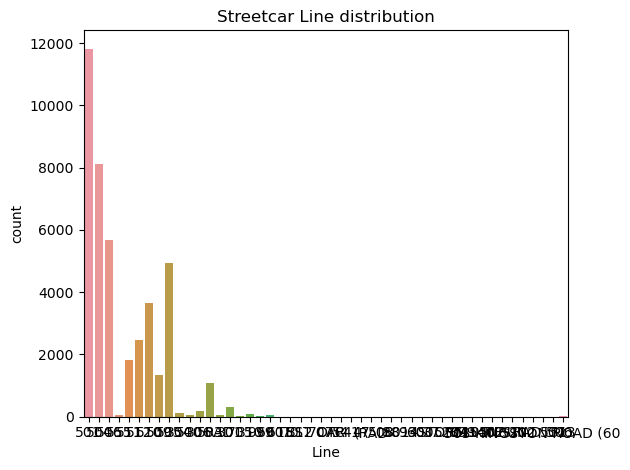

In [94]:
#visualizing the frequency of Line
sns.countplot(df, x='Line')

plt.title('Streetcar Line distribution')
plt.tight_layout()
#plt.xticks(rotation=90)

In [95]:
df.Line.value_counts(dropna=False)

501                      11824
504                       8123
506                       5673
505                       4932
510                       3651
512                       2465
511                       1836
509                       1351
503                       1068
301                        328
NaN                        216
306                        189
304                        134
310                         84
555                         67
500                         57
600                         52
RAD                         41
999                         31
513                         15
705                          9
OTC                          7
508                          4
312                          3
507                          2
54                           2
615                          1
TEST                         1
5101                         1
540                          1
502                          1
503 KINGSTON ROAD (60        1
RUN     

`Line` has obvious typos, irregular patterns(outliers), and null values. Let's start of by cleaning typos.

In [96]:
#Replacing 
df['Line'].replace(['503 KINGSTON ROAD (60','RAD 506',], ['503','506'], inplace=True)

In [97]:
df['Line'].replace(['RUN','(RAD'], ['RAD','RAD'], inplace=True)

In [98]:
df['Line'].replace('TEST CAR', 'TEST', inplace=True)

In [99]:
df[df['Line'] == 'STORM']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
33942,2023-02-17 05:00:00,-1.4,0.0,NaN,-8.0,26.0,9.7,Cloudy,2023-02-17 05:10:00,Friday,05:10,STORM,4419,ST CLAIR AND BATHURST,General Delay,37,45


In [100]:
#What is the acutal Line for this row?
df[df['Location'] == 'ST CLAIR AND BATHURST'].head(3)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
60,2021-01-02 08:00:00,-0.5,0.0,NaN,-5.0,13.0,16.1,Clear,2021-01-02 08:19:00,Saturday,08:19,512,4527,ST CLAIR AND BATHURST,General Delay,5,10
62,2021-01-02 08:00:00,-0.5,0.0,NaN,-5.0,13.0,16.1,Clear,2021-01-02 08:22:00,Saturday,08:22,512,4548,ST CLAIR AND BATHURST,General Delay,8,16
572,2021-01-18 15:00:00,0.6,0.0,NaN,NaN,8.0,16.1,Clear,2021-01-18 15:36:00,Monday,15:36,512,4439,ST CLAIR AND BATHURST,Operations,10,20


In [101]:
#Replacing 
df['Line'].replace('STORM', '512', inplace=True)

In [102]:
#replace what seems to be typos
df[df['Line']=='5014']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
28070,2022-09-16 23:00:00,18.4,0.0,NaN,NaN,35.0,16.1,Clear,2022-09-16 23:29:00,Friday,23:29,5014,0,KING AND SPADINA,General Delay,0,0


In [103]:
df[df['Location'] == 'KING AND SPADINA'].head(3)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
94,2021-01-02 19:00:00,1.5,0.0,NaN,NaN,8.0,16.1,Clear,2021-01-02 19:39:00,Saturday,19:39,504,4524,KING AND SPADINA,Security,0,0
97,2021-01-02 21:00:00,1.6,0.0,NaN,NaN,0.0,16.1,Clear,2021-01-02 21:56:00,Saturday,21:56,504,4404,KING AND SPADINA,Emergency Services,17,26
350,2021-01-09 17:00:00,2.0,0.0,NaN,NaN,18.0,16.1,Clear,2021-01-09 17:39:00,Saturday,17:39,504,4570,KING AND SPADINA,Held By,7,11


In [104]:
df['Line'].replace('5014', '504', inplace=True)

In [105]:
df[df['Line']=='5204']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
34571,2023-03-04 16:00:00,5.7,0.0,NaN,NaN,21.0,16.1,Clear,2023-03-04 16:52:00,Saturday,16:52,5204,8150,2365 DUNDAS ST W,Operations,7,14


In [106]:
df[df['Location'] == '2365 DUNDAS ST W'].head(3)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
28457,2022-09-26 14:00:00,16.1,0.0,NaN,NaN,30.0,16.1,Clear,2022-09-26 14:16:00,Monday,14:16,504,8560,2365 DUNDAS ST W,Operations,8,16
34571,2023-03-04 16:00:00,5.7,0.0,NaN,NaN,21.0,16.1,Clear,2023-03-04 16:52:00,Saturday,16:52,5204,8150,2365 DUNDAS ST W,Operations,7,14
38573,2023-06-12 14:00:00,16.3,0.2,NaN,NaN,26.0,4.8,Rain,2023-06-12 14:49:00,Monday,14:49,504,4545,2365 DUNDAS ST W,Mechanical,0,0


In [107]:
df['Line'].replace('5204', '504', inplace=True)

In [108]:
df[df['Line']=='5101']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
35383,2023-03-26 18:00:00,9.0,0.0,NaN,NaN,24.0,16.1,Clear,2023-03-26 18:02:00,Sunday,18:02,5101,4578,QUEEN AND RONCESVALLE,Security,7,14


In [109]:
df[df['Location'] == 'QUEEN AND RONCESVALLE']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
14997,2022-01-05 13:00:00,4.2,0.0,NaN,NaN,26.0,16.1,Clear,2022-01-05 13:04:00,Wednesday,13:04,501,7915,QUEEN AND RONCESVALLE,Operations,10,20
35383,2023-03-26 18:00:00,9.0,0.0,NaN,NaN,24.0,16.1,Clear,2023-03-26 18:02:00,Sunday,18:02,5101,4578,QUEEN AND RONCESVALLE,Security,7,14
36091,2023-04-12 20:00:00,11.9,0.0,NaN,NaN,13.0,16.1,Clear,2023-04-12 20:05:00,Wednesday,20:05,506,4500,QUEEN AND RONCESVALLE,Security,0,0
40687,2023-08-13 10:00:00,21.6,0.0,25.0,NaN,22.0,16.1,Clear,2023-08-13 10:25:00,Sunday,10:25,501,4474,QUEEN AND RONCESVALLE,Emergency Services,28,36


In [110]:
df['Line'].replace('5101', '501', inplace=True)

In [111]:
#Drop the rows with RAD and OTC and TEST, and make this into a numerical column. 
#The goal is to predict the delays so we don't need TEST, RAD, and OTC streetcar time.

condition = df['Line'].isin(['TEST', 'RAD', 'OTC'])
print(f'Potential drop shape: {df[condition].shape}')
df[condition].shape[0]/df.shape[0]*100

Potential drop shape: (52, 17)


0.12326072012705336

In [112]:
#dropping because the impact will be minimal.
df=df.drop(df[condition].index)
df.Line.value_counts()

501    11825
504     8125
506     5674
505     4932
510     3651
512     2466
511     1836
509     1351
503     1069
301      328
306      189
304      134
310       84
555       67
500       57
600       52
999       31
513       15
705        9
508        4
312        3
507        2
54         2
37         1
202        1
502        1
540        1
899        1
960        1
300        1
70         1
88         1
47         1
41         1
707        1
615        1
Name: Line, dtype: int64

In [113]:
#checking how much the null value affects the whole dataset
df.Line.isna().sum()/df.shape[0]*100

0.5126379494482022

In [114]:
df.loc[df.Line.isna(),:]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
219,2021-01-06 07:00:00,0.0,0.0,NaN,-4.0,13.0,16.1,Clear,2021-01-06 07:38:00,Wednesday,07:38,NaN,4447,RONCESVALLES CARHOUSE,Overhead,0,0
512,2021-01-16 06:00:00,0.7,0.0,NaN,NaN,13.0,16.1,Clear,2021-01-16 06:15:00,Saturday,06:15,NaN,4408,RUSSELL YARD,Emergency Services,0,0
1091,2021-02-03 16:00:00,0.9,0.0,NaN,NaN,28.0,16.1,Clear,2021-02-03 16:55:00,Wednesday,16:55,NaN,0,BROADVIEW STATION,Operations,0,0
1128,2021-02-04 23:00:00,2.8,0.0,NaN,NaN,18.0,16.1,Clear,2021-02-04 23:47:00,Thursday,23:47,NaN,0,BATHURST AND COLLEGE,Overhead,0,0
1236,2021-02-08 11:00:00,-8.5,0.0,NaN,-15.0,15.0,16.1,Clear,2021-02-08 11:39:00,Monday,11:39,NaN,0,RONCESVALLES DIV,Operations,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41524,2023-09-04 14:00:00,27.1,0.0,36.0,NaN,8.0,16.1,Clear,2023-09-04 14:30:00,Monday,14:30,NaN,0,CNE LOOP,Emergency Services,0,0
41578,2023-09-05 00:00:00,21.6,0.0,29.0,NaN,11.0,16.1,Clear,2023-09-05 00:33:00,Tuesday,00:33,NaN,4545,KINGSTON LOOP,Emergency Services,0,0
41754,2023-09-12 07:00:00,19.1,1.0,NaN,NaN,8.0,11.3,Rain,2023-09-12 07:41:00,Tuesday,07:41,NaN,0,QUEEN AND BROADVIEW,Rail/Switches,0,0
41841,2023-09-14 22:00:00,17.0,0.0,NaN,NaN,13.0,16.1,Clear,2023-09-14 22:05:00,Thursday,22:05,NaN,0,BROADVIEW AND SPARKHAL,General Delay,0,0


Just drop all the null values since they constitute only 0.1% of the entire dataset, and no patterns have been identified. Also, `Line` is not a crucial variable for predicting delays.

In [115]:
# Let's drop the last missing value
df.dropna(subset = ['Line'], inplace=True)

In [116]:
#no missing value
print(f'Line missing value is now at {df.Line.isna().sum()}.')

Line missing value is now at 0.


In [117]:
#change Line into integer

df['Line'] = df['Line'].astype(str).astype(int)

Text(0, 0.5, 'Count')

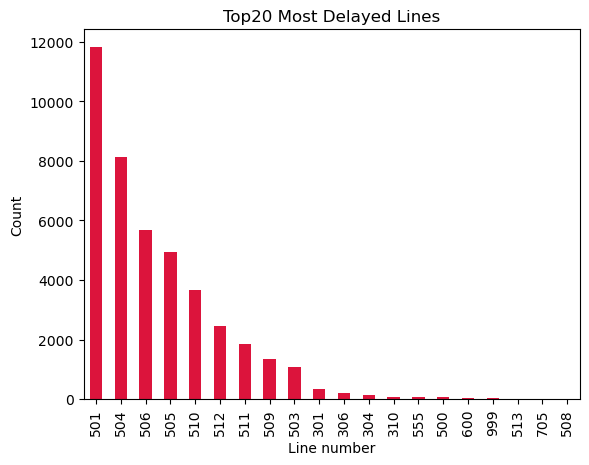

In [118]:
df.Line.value_counts().sort_values(ascending=False).head(20).plot(kind='bar', color='crimson')

plt.title('Top20 Most Delayed Lines')
plt.xlabel('Line number')
plt.ylabel('Count')

It looks like the Queen street line, 501 streetcar has the most delayed frequencies and then the King street line, 504 streetcar. 

--- 
### Imputing Vehicle Values

In [119]:
#checking datatype
df.Vehicle.dtype

dtype('int64')

<Axes: xlabel='Vehicle'>

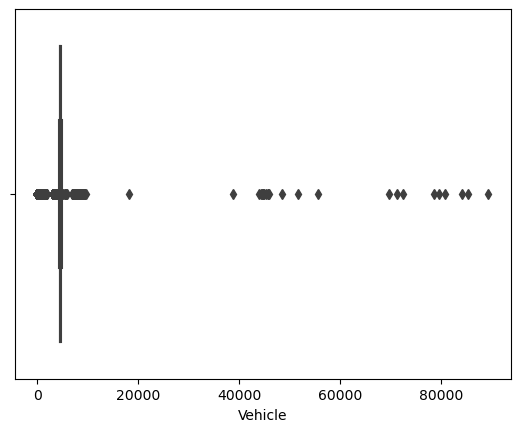

In [120]:
#checking the distribution of Vehicle
sns.boxplot(x=df['Vehicle'])

In [121]:
#how many unique values are there?
df.Vehicle.nunique()

1997

In [122]:
#Are the vehicle numbers after 20000 outliers?
df.Vehicle.sort_values(ascending=False)

7579     89367
23080    85383
13470    84166
18690    80701
33922    79579
         ...  
8938         0
8939         0
19634        0
8944         0
14412        0
Name: Vehicle, Length: 41919, dtype: int64

In [123]:
#How often are the vehicle numbers above 20000 used?
df[df['Vehicle'] > 20000]['Vehicle'].value_counts()

69763    1
89367    1
44901    1
45779    1
45710    1
44014    1
45852    1
48517    1
79579    1
44250    1
78520    1
38854    1
85383    1
71261    1
44693    1
80701    1
44620    1
84166    1
44654    1
44590    1
55654    1
45378    1
51571    1
72418    1
Name: Vehicle, dtype: int64

Text(0, 0.5, 'Frequency')

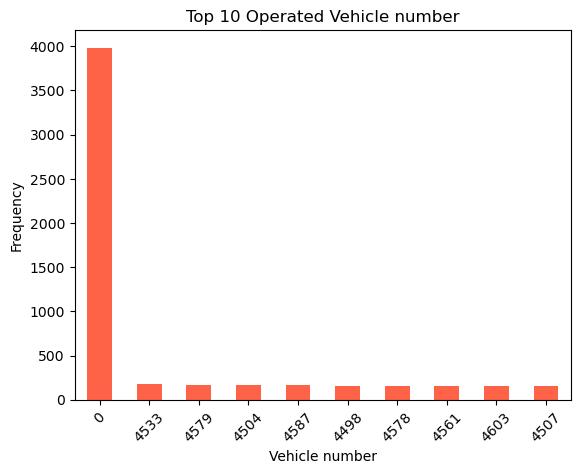

In [124]:
#ok, then what is the most operated vehicle number?

df.Vehicle.value_counts().head(10).plot(kind='bar', color='tomato')

plt.title('Top 10 Operated Vehicle number')
plt.xlabel('Vehicle number')
plt.xticks(rotation=45)
plt.ylabel('Frequency')

In [125]:
#checking the highest correlated variables
df.corr()['Vehicle'].sort_values(ascending=False)

Vehicle          1.000000
Temperature      0.067595
Summer_PT        0.030088
Winter_PT        0.027323
Visibility       0.015894
Wind_Speed      -0.000829
Precipitation   -0.001122
Min_Gap         -0.016348
Min_Delay       -0.028727
Line            -0.073656
Name: Vehicle, dtype: float64

In the exploration above, it's clear that there are around 40,000 rows with unrecorded vehicle numbers, with 2,000 unique values. There is no apparent correlation between this column and other variables. The vehicle numbers exceeding 20000 lack evidence of being valid which lead us to assume that they could be potential typos. According to [*Wikimedia Commons*](https://commons.wikimedia.org/w/index.php?title=Category:Numbers_on_Toronto_Transit_Commission_vehicles&subcatfrom=4588%0ANumber+4588+on+TTC+vehicles#mw-subcategories), while this source should be treated cautiously, TTC doesn't seem to use vehicle numbers with more than five digits.

In [126]:
#looking at the null rows
empty = df[(df.Vehicle.isna()) | (df.Vehicle==0)]

#which line number has the most 0 Vehicle values?
empty.Line.value_counts()

501    1460
504     944
506     515
505     298
510     207
511     173
512     111
503      96
509      74
500      38
555      24
306      11
301      10
999       8
304       6
310       4
705       1
600       1
202       1
507       1
513       1
Name: Line, dtype: int64

In [127]:
#show me all the vehicle numbers when line is 501
test =df[['Line', 'Vehicle']][df['Line'] == 501]
test

,Line,Vehicle
0,501,4574
6,501,4496
33,501,4469
35,501,4496
43,501,4484
...,...,...
42376,501,8392
42380,501,7230
42382,501,8130
42383,501,8392


In [128]:
#looking into another line number
df[['Line', 'Vehicle']][df['Line'] == 503]

,Line,Vehicle
162,503,4532
180,503,4587
217,503,4600
218,503,4548
445,503,4550
...,...,...
42320,503,8772
42331,503,8826
42336,503,8687
42386,503,3482


Can't seem to find any patterns, for instance, the vehicle number varies from 45xx to 89xx.

In [129]:
#show me all the vehicle numbers when line is 501
test.groupby('Vehicle').count().sort_values('Line', ascending=False)

,Line
Vehicle,
0,1460
4537,39
4596,39
4579,36
4484,33
...,...
3116,1
3115,1
8702,1


In [130]:
#how much of this account for overall?
df[df.Vehicle==0].shape[0]/df.shape[0]*100

9.504043512488371

Is it necessary to handle this variable? If we had a `Vehicle` column, we could investigate its relationship with the `Incident` column to explore which vehicle causes the most delays. However, the count of vehicles is too broad with 2000 unique values and considerable inconsistency. Let's consider dropping this column.

---
### Cleaning Incident Values

In [131]:
#checking null values
df.Incident.unique()

array(['Operations', 'Cleaning', 'Mechanical', 'General Delay',
       'Emergency Services', 'Held By', 'Utilized Off Route', 'Late',
       'Security', 'Overhead', 'Collision - TTC Involved',
       'Investigation', 'Diversion', 'Rail/Switches',
       'Late Leaving Garage', 'Late  ', nan, 'Late Entering Service',
       'Cleaning - Unsanitary', 'Cleaning - Disinfection', 'Management'],
      dtype=object)

In [132]:
df.Incident.isna().sum()

1

In [133]:
df.Incident.value_counts()

Operations                  15384
Mechanical                   4462
General Delay                3839
Security                     3663
Emergency Services           2890
Held By                      2876
Cleaning - Unsanitary        2121
Diversion                    1866
Collision - TTC Involved     1448
Utilized Off Route           1122
Cleaning                     1047
Investigation                 575
Overhead                      267
Rail/Switches                 130
Late                          100
Late Entering Service          79
Management                     17
Late Leaving Garage            14
Late                            9
Cleaning - Disinfection         9
Name: Incident, dtype: int64

No hidden missing values exist here, let's drop the single missing value and clean the string values.

In [134]:
#drop incident because there is only 1 row.
df.dropna(subset = ['Incident'], inplace=True)

In [135]:
#Replacing duplicated lables
df['Incident'].replace(['Cleaning - Unsanitary','Cleaning','Cleaning - Disinfection'], 'Cleaning', inplace=True)

In [136]:
#Replacing 
df['Incident'].replace(['Late  ','Late'], 'Late', inplace=True)

In [137]:
#looks good
df.Incident.value_counts()

Operations                  15384
Mechanical                   4462
General Delay                3839
Security                     3663
Cleaning                     3177
Emergency Services           2890
Held By                      2876
Diversion                    1866
Collision - TTC Involved     1448
Utilized Off Route           1122
Investigation                 575
Overhead                      267
Rail/Switches                 130
Late                          109
Late Entering Service          79
Management                     17
Late Leaving Garage            14
Name: Incident, dtype: int64

Text(0.5, 1.0, 'Top 10 Occurrences for Delay')

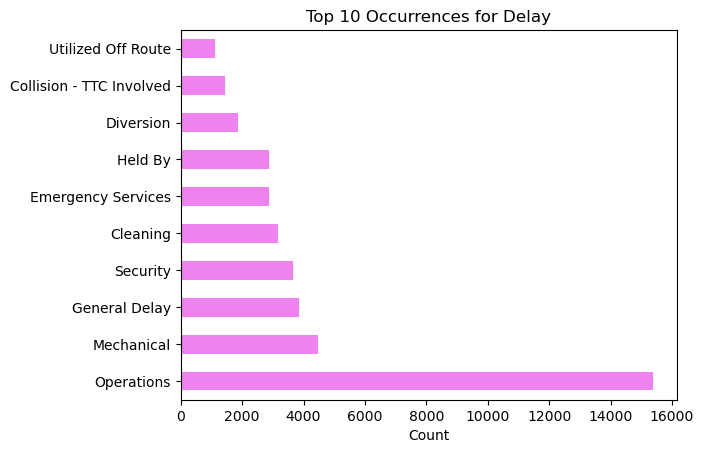

In [138]:
df.Incident.value_counts().sort_values(ascending=False).head(10).plot(kind='barh', color='violet')

plt.xlabel('Count')
plt.title('Top 10 Occurrences for Delay')

Operations such as scheduling, staffing, coordination, or that impact regular operations seems to be the number one reason for delay. Mechanical delays could be due to engine failures, brake problems, or any malfunction related to the mechanical systems of the vehicle.

----
### Cleaning Location values

In [139]:
df.Location.nunique()

4252

In [140]:
df.Location.value_counts()

DUNDAS WEST STATION       1474
BROADVIEW STATION          863
SPADINA STATION            853
QUEEN AND RONCESVALLES     697
EXHIBITION LOOP            607
                          ... 
RONCESVAILLES AMD HOWA       1
ST CLAIR AND GLENHOLM        1
GERRARD AND MARJOY           1
KINGA ND CHURCH              1
1626 QUEEN ST EAST           1
Name: Location, Length: 4252, dtype: int64

In [141]:
punctuation = df[df['Location'].str.contains(r'[^\w\s]')]
print(f'There are {punctuation.shape[0]} rows of uncleaned locations.')
punctuation.Location.unique()

There are 866 rows of uncleaned locations.


array(["SPADINA AND QUEEN'S QU", "QUEEN'S QUAY LOOP",
       'LANSDOWNE LOOP - COLLE', 'QUEEN AND ST. PATRICK',
       "QUEEN'S QUAY AND SPADI", "QUEEN'S PARK AND UNIVE",
       "QUEEN'S QUAY STATION", 'BATHURST AND QUEEN (NO',
       'DUFFERIN AND KING (NOR', "QUEEN'S QUAY AND REES",
       'SPADINA STATION - SPAR', "QUEEN'S QUAY AND SIMCO",
       "BROWN'S LINE AND LAKES", 'QUEEN AND KING (W OF D',
       'KING AND PARLIMENT (WE', "GUNN'S LOOP", 'DUNDAS AND LAKEVIEW (E',
       'ST. CLAIR AND BATHURST', 'KING ST. E. AT RIVER S',
       "ST MICHAEL'S HOSPITAL", 'RONCESVALLES YARD- NOR',
       "QUEEN'S QUAY FERRY DOC", 'UNION STATION- STREETC',
       'LANSDOWNE LOOP @ 1050', "QUEEN AND O'HARA", '`MAIN STREET STATIN',
       'KING AND SPENCER (W OF', 'LANSDOWNE LOOP (DUNDAS',
       'HUMBER LOOP- LAKESHORE', 'CHURCH AND DUNDAS (NOR',
       "QUEEN'S QUAY AND LOWER", 'DUNDAS AND SHERIDAN (E',
       'KING AND SHAW (NORTH O', 'KING AND SPENCER AVE (',
       'QUEEN - STRACHAN TO GO', 'L

It makes more sense to drop `Location` as there are 4000 unique values, and we cannot use this variable to run a logistic regression model. Additionally, the location where the delay occurred is unlikely to provide critical information for our analysis, which focuses on predicting streetcar delays based on weather conditions.

---

In [142]:
#what's next?
df.isna().sum()

Datetime             0
Temperature          0
Precipitation        0
Summer_PT        34731
Winter_PT        34815
Wind_Speed           0
Visibility           0
Weather              0
Delaytime            0
Day                  0
Time                 0
Line                 0
Vehicle              0
Location             0
Incident             0
Min_Delay            0
Min_Gap              0
dtype: int64

So far, we have focused on cleaning features such as `Temperature, Precipitation, Wind Speed, Visibility, Weather, Line and Incident`. Now, we will address the categorical columns to prepare for building machine learning models to predict streetcar delays.

--- 
## <a id='featureID'> Feature Engineering </a>

In this project, our goal is to forecast streetcar delays considering various factors, including time, incidents, and weather conditions. Typically, in a binary classification scenario, we would utilize on-time data as the target variable. Since we only have data for delayed instances, we'll use the `Min Delay` column as our target to predict delays. We'll organize the delay times into categories to create a multiclass target feature.

----
### Categorizing Min_Delay values

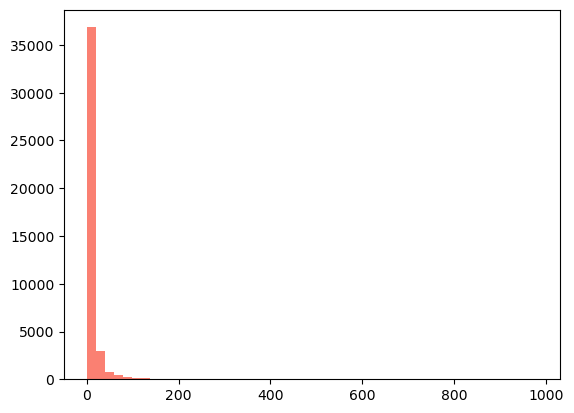

In [143]:
#looking at the distribution of target column
plt.hist(df.Min_Delay, bins=50, color='salmon')
plt.show()

In [144]:
#why is it so broad?
df.Min_Delay.describe()

count    41918.000000
mean        14.098192
std         34.584230
min          0.000000
25%          6.000000
50%          8.000000
75%         10.000000
max        981.000000
Name: Min_Delay, dtype: float64

In [145]:
#looking at the max delayed row
df[df.Min_Delay== 981]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
7946,2021-08-08 06:00:00,21.8,0.0,30.0,NaN,8.0,4.8,Cloudy,2021-08-08 06:11:00,Sunday,06:11,510,0,SPADINA AND CECIL,Investigation,981,991


In [146]:
#show me all the min delays when the count is below 10

value_counts = df.Min_Delay.value_counts().sort_values(ascending=False)
value_below_5 = value_counts[value_counts <10]
value_below_5

102    9
97     9
91     9
105    8
96     8
      ..
205    1
618    1
573    1
684    1
798    1
Name: Min_Delay, Length: 237, dtype: int64

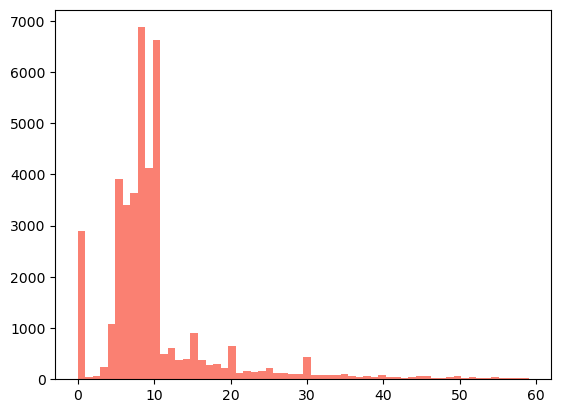

In [147]:
#show me the distribution of delayed minutes under 60 minutes
plt.hist(df[df.Min_Delay<60].Min_Delay, bins=60, color='salmon')
plt.show()

In [148]:
13500/40000*100

33.75

Our current data has approximately 40,000 rows. Among them, there are 7,000 instances when the streetcar was delayed for 8 minutes and 6,500 instances when it was delayed for 10 minute, which takes over 34% of the entire dataset. We need to separate these two delays, otherwise it will create an extremely imbalanced class.

How we will categorize the `Min_Delay`: 

- Slight Delay:Delays between 0 to 6 minutes
- Moderate Delay: Delays between 7 to 9 minutes.
- Severe Delay: Delays greater than 10 minutes.

In [149]:
#categorizing
def categorize_delay(min_delay):
    if min_delay <= 6:
        return "Slight Delay"
    elif 7 <= min_delay < 10:
        return "Moderate Delay"
    else:
        return "Severe Delay"

df['Min_Delay'] = df['Min_Delay'].apply(categorize_delay)

In [150]:
#successfully categorized it
df['Min_Delay'].value_counts().sort_values()

Slight Delay      11648
Moderate Delay    14634
Severe Delay      15636
Name: Min_Delay, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Slight Delay'),
  Text(1, 0, 'Moderate Delay'),
  Text(2, 0, 'Severe Delay')])

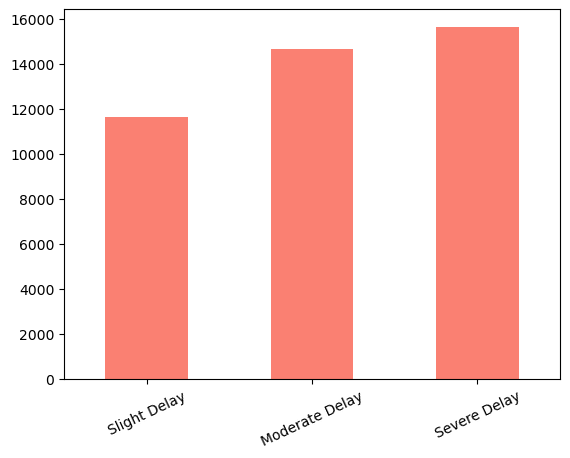

In [151]:
#visualing the target feature
df['Min_Delay'].value_counts().sort_values().plot(kind='bar', color='salmon')
plt.xticks(rotation = 25)

In [152]:
#Let's encode this to use for modelling
df['Min_Delay'] = df['Min_Delay'].map({'Slight Delay': 0, 'Moderate Delay':1,'Severe Delay':2 })

In [153]:
#checking
df.Min_Delay.value_counts().sort_index()

0    11648
1    14634
2    15636
Name: Min_Delay, dtype: int64

--- 
### Encoding Ordinal Variable

In [154]:
#confirming the values
df.Day.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [155]:
#Mapping Day
df['Day'] = df['Day'].map({'Monday': 0,'Tuesday': 1, 'Wednesday': 2,'Thursday':3, 'Friday':4 , 'Saturday':5, 'Sunday':6})

In [156]:
#confirming
df['Day'].unique()

array([4, 5, 6, 0, 1, 2, 3])

In [157]:
#great!
df.head()

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Time,Line,Vehicle,Location,Incident,Min_Delay,Min_Gap
0,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5.0,16.1,Clear,2021-01-01 03:15:00,4,03:15,501,4574,QUEEN AND MCCAUL,Operations,2,24
1,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5.0,16.1,Clear,2021-01-01 03:37:00,4,03:37,504,4500,BROADVIEW AND QUEEN,Operations,2,30
2,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5.0,16.1,Clear,2021-01-01 04:00:00,4,04:00,504,4589,BROADVIEW STATION,Cleaning,2,30
3,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5.0,16.1,Clear,2021-01-01 04:03:00,4,04:03,504,4582,DUNDAS WEST STATION,Cleaning,2,30
4,2021-01-01 05:00:00,0.4,0.0,NaN,NaN,5.0,16.1,Clear,2021-01-01 05:37:00,4,05:37,506,3480,MAIN STATION,Mechanical,2,20


---
### Extracting Delaytime Features

In [158]:
#checking datatype 
df.Delaytime

0       2021-01-01 03:15:00
1       2021-01-01 03:37:00
2       2021-01-01 04:00:00
3       2021-01-01 04:03:00
4       2021-01-01 05:37:00
                ...        
42397   2023-09-30 22:53:00
42398   2023-09-30 23:21:00
42399   2023-09-30 23:41:00
42400   2023-09-30 00:48:00
42401   2023-09-30 01:22:00
Name: Delaytime, Length: 41918, dtype: datetime64[ns]

Let's break down the values into five columns as year, month, date, hour, and minute to be used in a later model.

In [159]:
df['Year'] = df['Delaytime'].dt.year
df['Month'] = df['Delaytime'].dt.month
df['Date'] = df['Delaytime'].dt.day
df['Hour'] = df['Delaytime'].dt.hour
df['Minute'] = df['Delaytime'].dt.minute

In [160]:
#checking
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41918 entries, 0 to 42401
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       41918 non-null  datetime64[ns]
 1   Temperature    41918 non-null  float64       
 2   Precipitation  41918 non-null  float64       
 3   Summer_PT      7187 non-null   float64       
 4   Winter_PT      7103 non-null   float64       
 5   Wind_Speed     41918 non-null  float64       
 6   Visibility     41918 non-null  float64       
 7   Weather        41918 non-null  object        
 8   Delaytime      41918 non-null  datetime64[ns]
 9   Day            41918 non-null  int64         
 10  Time           41918 non-null  object        
 11  Line           41918 non-null  int64         
 12  Vehicle        41918 non-null  int64         
 13  Location       41918 non-null  object        
 14  Incident       41918 non-null  object        
 15  Min_Delay      4191

--- 
### Binary Encoding Summer and Winter Perceived Temperature

Recall that we had 85% null values in the `Summer PT` and `Winter PT` columns. Let's transform this into a binary column where 0 indicates no heat/freezing cold warning days, and 1 indicates days with heat/freezing cold warnings.

In [161]:
#Looking at the values of Summer heat warning days
df.Summer_PT.unique()

array([nan, 27., 26., 25., 28., 30., 32., 29., 31., 34., 33., 37., 35.,
       36., 38., 39., 40., 42., 41.])

In [162]:
#when summer_Pt has values than 1 and if it's null 0
df['Summer_PT'] = df['Summer_PT'].apply(lambda x: 1 if x > 1 else x)

df['Summer_PT'] = df['Summer_PT'].fillna(0)

Text(0.5, 1.0, 'Heat Warning Frequency')

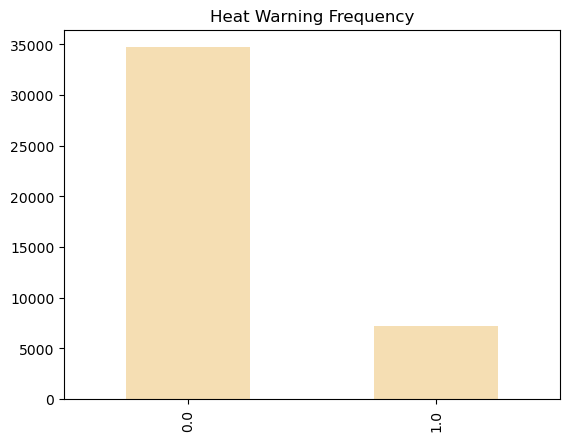

In [163]:
#checking
df.Summer_PT.value_counts().plot(kind='bar', color='wheat')
plt.title('Heat Warning Frequency')

In [164]:
#Tranforming
df.Summer_PT = df.Summer_PT.replace(0.0, False).replace(1.0, True)

Text(0, 0.5, 'Frequency')

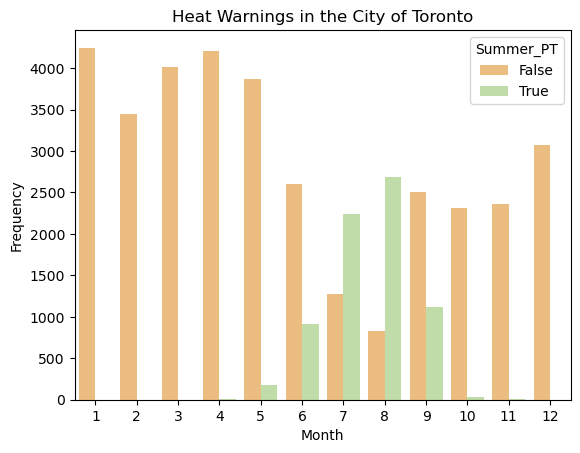

In [165]:
#How frequent does the heat warning occur?
sns.countplot(x='Month', data=df, hue='Summer_PT', palette='Spectral')

plt.title('Heat Warnings in the City of Toronto')
plt.xlabel('Month')
plt.ylabel('Frequency')

In [166]:
#Looking at the values of Winter freezing cold warning days
df.Winter_PT.unique()

array([ -4.,  -3.,  nan,  -5.,  -6.,  -7.,  -8.,  -9., -13., -12.,  -2.,
       -11., -10., -14., -15., -16., -17.,  -1., -18., -20., -21., -19.,
       -22., -23., -29., -28., -27., -25., -24., -30., -26.])

In [167]:
#when Winter_Pt has values than 1 and if it's null 0
df['Winter_PT'] = df['Winter_PT'].apply(lambda x: 1 if x < 1 else x)

df['Winter_PT'] = df['Winter_PT'].fillna(0)

Text(0.5, 1.0, 'Feezing Cold Warning Frequency')

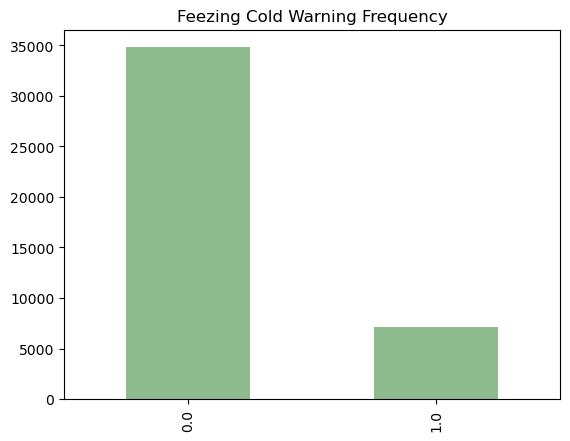

In [168]:
#checking
df.Winter_PT.value_counts().plot(kind='bar', color='darkseagreen')
plt.title('Feezing Cold Warning Frequency')

In [169]:
df.Winter_PT = df.Winter_PT.replace(0.0, False).replace(1.0, True)

Text(0, 0.5, 'Frequency')

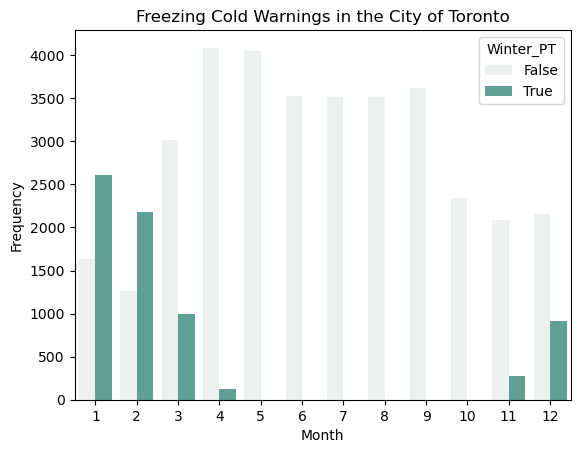

In [170]:
#How frequent does the heat warning occur?
sns.countplot(x='Month', data=df, hue='Winter_PT', palette="light:#5A9")

plt.title('Freezing Cold Warnings in the City of Toronto')
plt.xlabel('Month')
plt.ylabel('Frequency')

### One Hot Encoding

Let's drop unnecessary columns and convert categorical columns into dummy variables to complete the preparation for modeling.

In [171]:
#looking
df.dtypes

Datetime         datetime64[ns]
Temperature             float64
Precipitation           float64
Summer_PT                  bool
Winter_PT                  bool
Wind_Speed              float64
Visibility              float64
Weather                  object
Delaytime        datetime64[ns]
Day                       int64
Time                     object
Line                      int64
Vehicle                   int64
Location                 object
Incident                 object
Min_Delay                 int64
Min_Gap                   int64
Year                      int64
Month                     int64
Date                      int64
Hour                      int64
Minute                    int64
dtype: object

Columns to drop:
- `Datetime, Delaytime, and Time` is extracted into separate columns.
- `Wind Speed and Visibility` was used to handle Weather conditions.
- `Min Gap, Location, and Vehicle` isn't a critical column.

In [172]:
#dropping nunneed variables
drops = ['Datetime','Wind_Speed','Visibility','Time','Delaytime','Location','Min_Gap','Vehicle']

df=df.drop(drops, axis =1)

In [173]:
#checking
df.dtypes

Temperature      float64
Precipitation    float64
Summer_PT           bool
Winter_PT           bool
Weather           object
Day                int64
Line               int64
Incident          object
Min_Delay          int64
Year               int64
Month              int64
Date               int64
Hour               int64
Minute             int64
dtype: object

In [174]:
#Final datatype converting
df.select_dtypes('object').columns

Index(['Weather', 'Incident'], dtype='object')

In [175]:
#In_placing dummy variables

final = pd.get_dummies(df,columns=['Weather', 'Incident'], dtype=int,drop_first=True)
print(f'The final dataframe has {final.shape[0]} rows and {final.shape[1]} columns.')
final.head()

The final dataframe has 41918 rows and 39 columns.


,Temperature,Precipitation,Summer_PT,Winter_PT,Day,Line,Min_Delay,Year,Month,Date,...,Incident_Late,Incident_Late Entering Service,Incident_Late Leaving Garage,Incident_Management,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
0,-2.0,0.0,False,True,4,501,2,2021,1,1,...,0,0,0,0,0,1,0,0,0,0
1,-2.0,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,1,0,0,0,0
2,-1.4,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.4,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.4,0.0,False,False,4,506,2,2021,1,1,...,0,0,0,0,1,0,0,0,0,0


---
## <a id='EDAID'> EDA </a>

In [176]:
nums = ['Temperature', 'Precipitation','Line','Min_Delay','Year','Month','Hour']

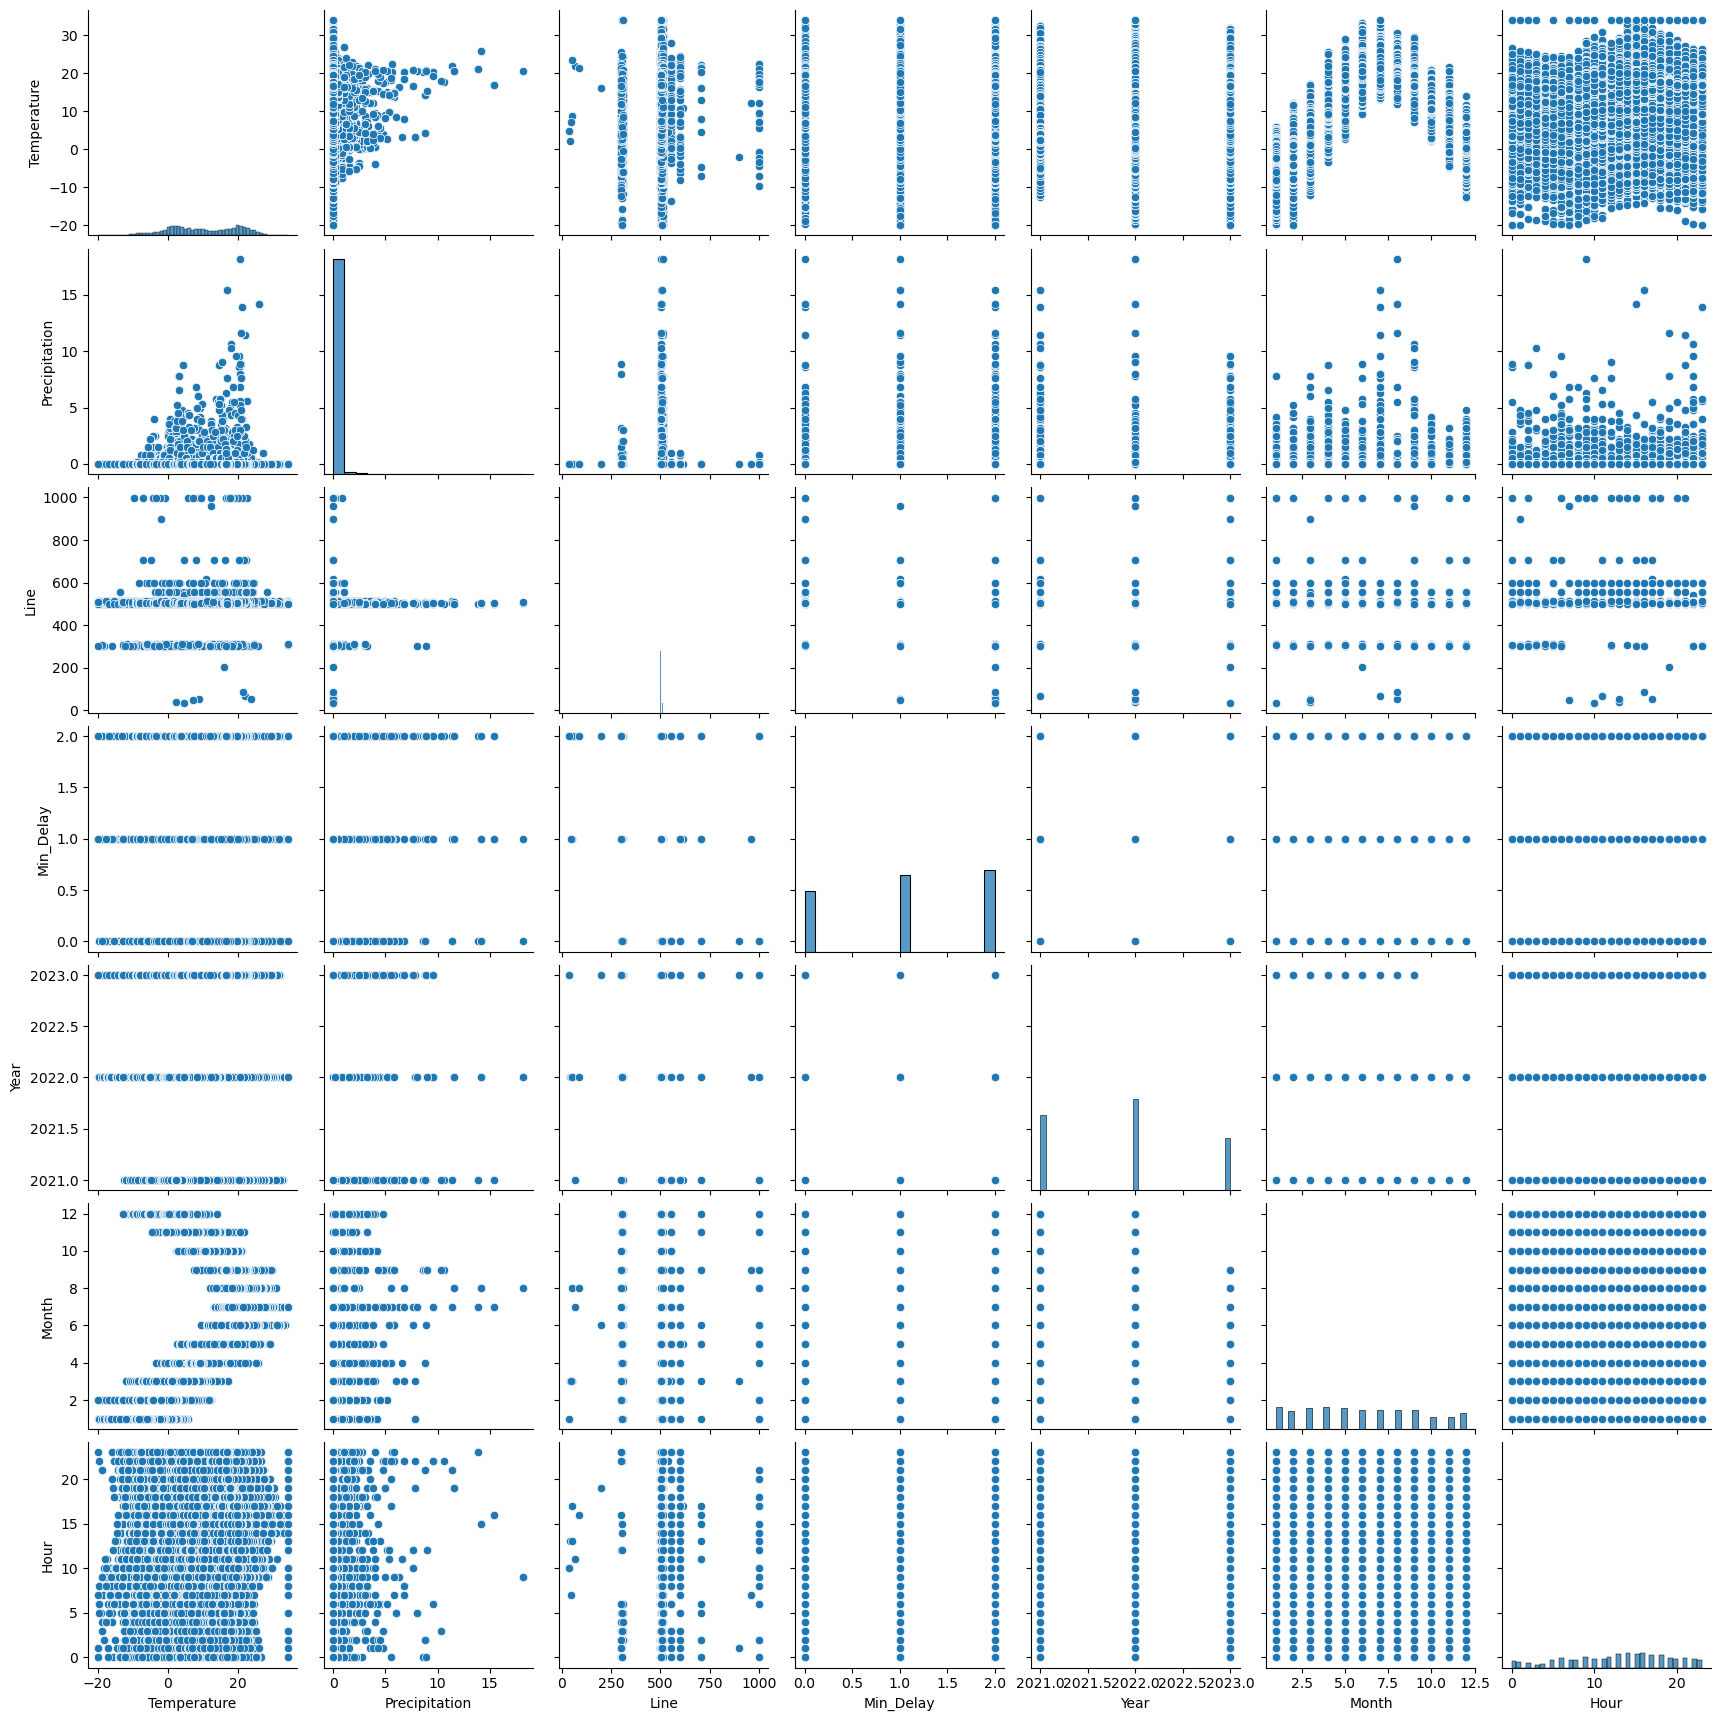

In [177]:
#looking into feature distribution with clean data
sns.pairplot(df[nums])

Intersting Observations:

- The scatter plot for `Temperature` and `Hour` shows a distinct pattern, indicating a drop in temperature during midnight to early mornings and an increase during the day.
- `Temperature` and `Month` exhibit a visual representation of seasonal temperature changes in the city.
- In 2022, it appears that the city experienced particularly heavy rainy days with precipitation exceeding 15mm.
- The data suggests that rainfall is most prevalent during the summer months.
- The scatter plot describes a correlation between the amount of rain and streetcar delays. Significant delays tend to occur on days with heavy rain or snow.
- Streetcars operating on lines between 500 and 600 appear to be the most active.

In [178]:
important_features = ['Temperature', 'Precipitation', 'Summer_PT', 'Winter_PT', 'Day', 'Line',
       'Min_Delay', 'Year', 'Month', 'Hour',
       'Weather_Cloudy', 'Weather_Freezing Rain',
       'Weather_Haze', 'Weather_Heavy Rain', 'Weather_Heavy Snow',
       'Weather_Moderate Rain', 'Weather_Moderate Snow', 'Weather_Rain',
       'Weather_Snow',
       'Incident_Collision - TTC Involved', 'Incident_Diversion',
       'Incident_Emergency Services', 'Incident_General Delay',
       'Incident_Held By', 'Incident_Investigation', 'Incident_Late',
       'Incident_Late Entering Service', 'Incident_Late Leaving Garage',
       'Incident_Management', 'Incident_Mechanical', 'Incident_Operations',
       'Incident_Overhead', 'Incident_Rail/Switches', 'Incident_Security',
       'Incident_Utilized Off Route']

correlation_matrix = final[important_features].corr()
correlation_matrix

,Temperature,Precipitation,Summer_PT,Winter_PT,Day,Line,Min_Delay,Year,Month,Hour,...,Incident_Late,Incident_Late Entering Service,Incident_Late Leaving Garage,Incident_Management,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
Temperature,1.000000,0.005918,0.606684,-0.662122,-0.009551,0.018711,0.044591,0.017424,0.420586,0.085309,...,-0.019271,-0.014892,0.006699,0.021147,-0.011278,0.020772,-0.002392,-0.001027,-0.038198,-0.017213
Precipitation,0.005918,1.000000,0.004569,-0.033146,-0.021669,-0.001958,0.000727,0.013943,-0.004236,-0.009600,...,-0.004502,-0.001524,-0.002717,-0.002560,0.016112,-0.022372,0.010775,-0.004520,-0.001745,-0.000214
Summer_PT,0.606684,0.004569,1.000000,-0.205472,-0.007459,0.023389,0.031700,0.018732,0.200672,0.062401,...,-0.014527,-0.012470,0.009005,0.019130,0.005536,0.025654,0.012111,-0.002606,-0.042593,-0.003675
Winter_PT,-0.662122,-0.033146,-0.205472,1.000000,0.032988,-0.007547,-0.009983,-0.001526,-0.347880,-0.060028,...,0.001910,0.009697,-0.001296,-0.009098,0.019571,-0.026231,0.014993,0.003398,0.012904,0.022803
Day,-0.009551,-0.021669,-0.007459,0.032988,1.000000,-0.006985,0.040746,-0.003875,-0.010803,0.015022,...,0.006437,0.004594,0.008216,0.000159,-0.006039,-0.022694,-0.003847,-0.008842,0.003490,-0.017193
Line,0.018711,-0.001958,0.023389,-0.007547,-0.006985,1.000000,-0.089794,0.002772,0.003757,0.180182,...,0.005462,0.005709,0.001425,0.001483,0.011110,0.056061,0.012663,0.007472,-0.043200,-0.022094
Min_Delay,0.044591,0.000727,0.031700,-0.009983,0.040746,-0.089794,1.000000,0.164077,0.011850,-0.003159,...,-0.023605,-0.009966,-0.002171,-0.008308,-0.043401,-0.173949,0.024179,0.000874,-0.001528,0.003368
Year,0.017424,0.013943,0.018732,-0.001526,-0.003875,0.002772,0.164077,1.000000,-0.223928,-0.015416,...,-0.060499,0.024938,-0.021657,-0.023866,0.019618,-0.160597,-0.007173,0.015100,0.040924,0.000654
Month,0.420586,-0.004236,0.200672,-0.347880,-0.010803,0.003757,0.011850,-0.223928,1.000000,0.034294,...,-0.034902,-0.017125,-0.003298,0.007874,-0.022893,0.055550,-0.015374,0.016979,-0.023221,0.003349
Hour,0.085309,-0.009600,0.062401,-0.060028,0.015022,0.180182,-0.003159,-0.015416,0.034294,1.000000,...,-0.017443,-0.014066,-0.007747,-0.016831,-0.003649,0.040482,-0.020087,-0.019585,-0.037536,0.003140


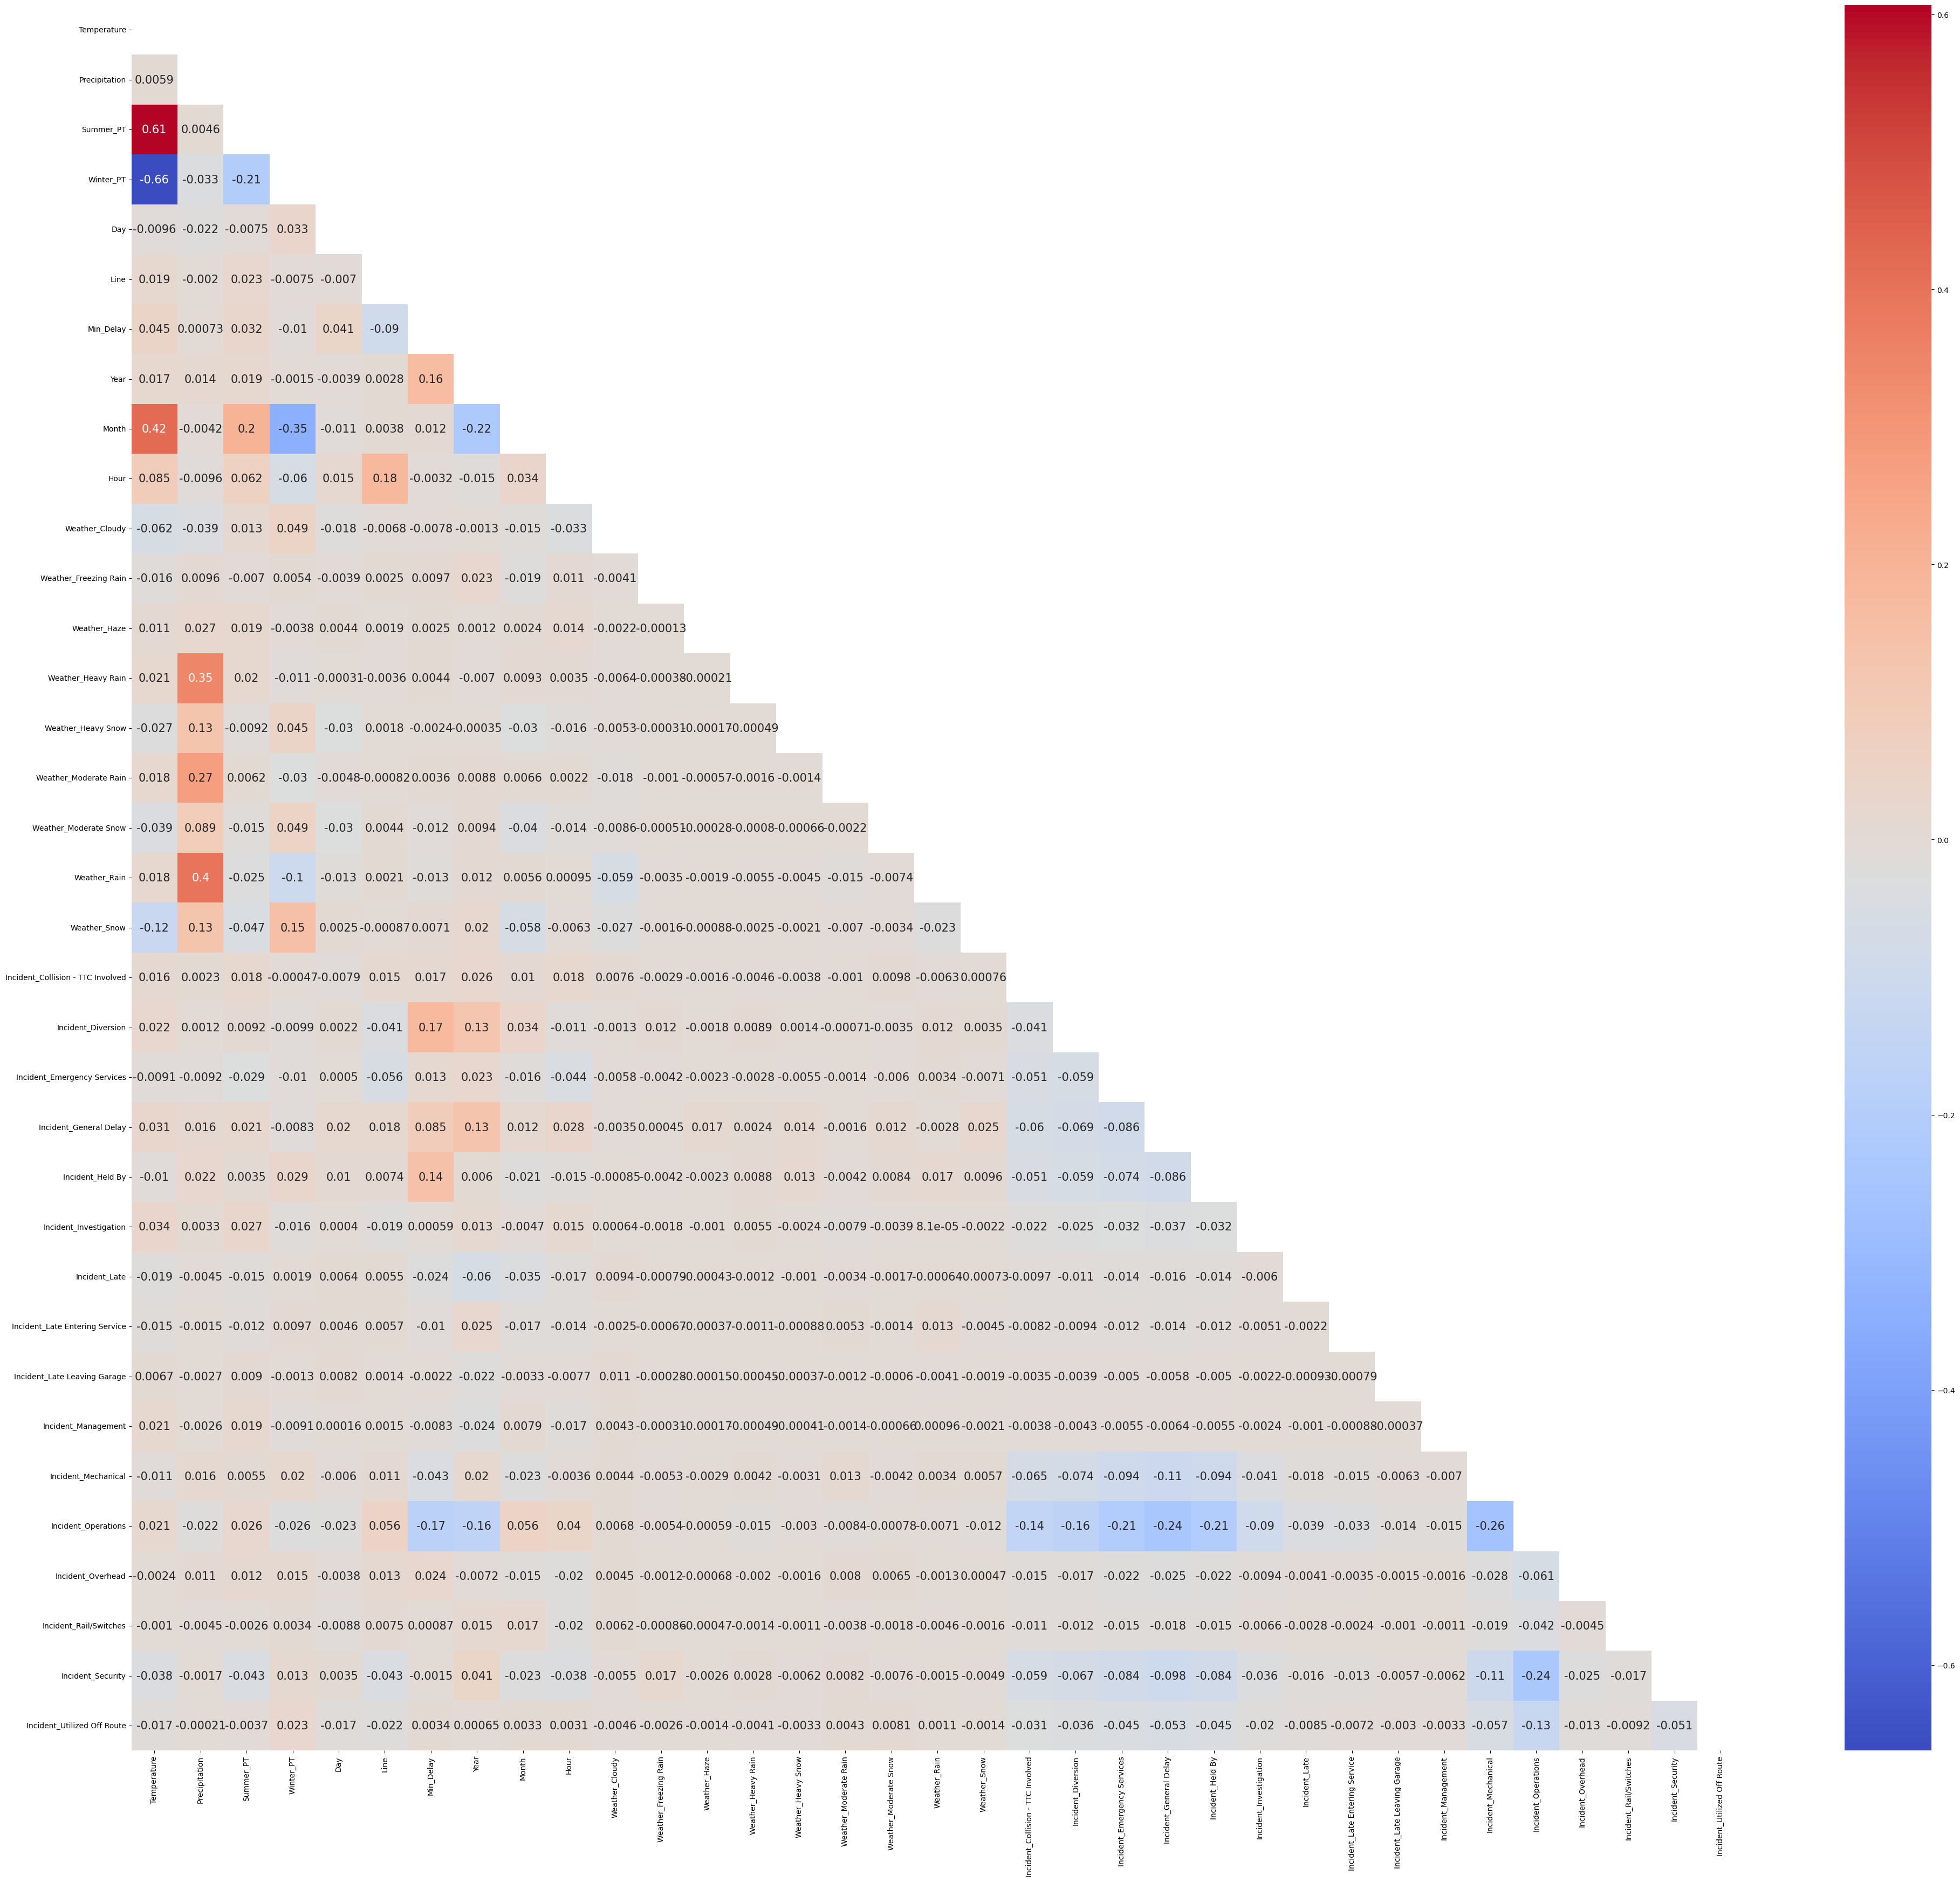

In [179]:
#let's visualize this
plt.figure(figsize=(40,35))

matrix=np.triu(final[important_features].corr())
sns.heatmap(final[important_features].corr(), annot=True, mask=matrix, cmap='coolwarm', annot_kws={"size": 15})

plt.tight_layout()

Interesting Observations:

- Warmer temperatures are linked to heat warnings, while colder temperatures are associated with freezing cold warnings.
- Freezing cold weather tends to occur on snowy days, with a correlation coefficient of 0.15.
- Rainy or snowy days coincide with positive correlations in Precipitation.
- The Streetcar Line has a slight positive correlation with the Hour of the day.
- Common reasons for streetcar delays include Diversion, General Delay, and Held by.

The result of the correlation coefficient aligns with common sense, indicating that our data is true and reliable. However, there seems to be a very weak relationship between the weather and streetcar delays.

In [180]:
#final final check!

print(final.info())
print('\n')
print(f'final size: {final.shape}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41918 entries, 0 to 42401
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Temperature                        41918 non-null  float64
 1   Precipitation                      41918 non-null  float64
 2   Summer_PT                          41918 non-null  bool   
 3   Winter_PT                          41918 non-null  bool   
 4   Day                                41918 non-null  int64  
 5   Line                               41918 non-null  int64  
 6   Min_Delay                          41918 non-null  int64  
 7   Year                               41918 non-null  int64  
 8   Month                              41918 non-null  int64  
 9   Date                               41918 non-null  int64  
 10  Hour                               41918 non-null  int64  
 11  Minute                             41918 non-null  int

In [181]:
final.head()

,Temperature,Precipitation,Summer_PT,Winter_PT,Day,Line,Min_Delay,Year,Month,Date,...,Incident_Late,Incident_Late Entering Service,Incident_Late Leaving Garage,Incident_Management,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
0,-2.0,0.0,False,True,4,501,2,2021,1,1,...,0,0,0,0,0,1,0,0,0,0
1,-2.0,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,1,0,0,0,0
2,-1.4,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.4,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.4,0.0,False,False,4,506,2,2021,1,1,...,0,0,0,0,1,0,0,0,0,0


-----
## <a id='summaryID'> Summary</a>

In our initial steps, we tackled duplicates and missing values, then we transformed categorical variables to make a multiclass target feature. The clean data reveals a slight relationship between the target feature and the precipitation. In the upcoming notebook, we will proceed to build several machine learning models to forecast streetcar delays using our predictor variables.

----
##  <a id='saveID'> Data Saving </a>

In [182]:
#saving the clean dataframe to use in the next notebook!
final.to_csv('Capstone_clean_model.csv', index=False)